In [62]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_rows', 1000000)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format',lambda x: '%.4f' % x)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.pyplot import figure
import matplotlib.pylab as pll
from collections import Counter
from datetime import datetime
import time
import random
import math
import os
import itertools
from matplotlib import ticker
import matplotlib.colors as colors
from pylab import rcParams

In [63]:
slurm1 = pd.read_csv('SlurmPlot2.csv')
slurm1.tail(100)

,Unnamed: 0,UID,Account,JobID,AllocCPUS,AllocNodes,AssocID,AveCPU,AveCPUFreq,AveDiskRead,AveDiskWrite,AvePages,AveRSS,AveVMSize,Cluster,ConsumedEnergyRaw,CPUTime,CPUTimeRAW,DBIndex,Elapsed,ElapsedRaw,Eligible,End,ExitCode,JobIDRaw,Layout,MaxDiskRead,MaxDiskReadNode,MaxDiskReadTask,MaxDiskWrite,MaxDiskWriteNode,MaxDiskWriteTask,MaxPages,MaxPagesNode,MaxPagesTask,MaxRSS,MaxRSSNode,MaxRSSTask,MaxVMSize,MaxVMSizeNode,MaxVMSizeTask,NCPUS,NNodes,NodeList,NTasks,Priority,Partition,QOS,QOSRAW,ReqCPUFreq,ReqCPUFreqMin,ReqCPUFreqMax,ReqCPUFreqGov,ReqCPUS,ReqMem,ReqNodes,Reservation,ReservationId,Reserved,ResvCPU,ResvCPURAW,Start,State,Submit,SystemCPU,Timelimit,TimelimitRaw,TotalCPU,UserCPU,TRESAllocEnergy,TRESBilling,TRESAllocMem,TRESAllocCPU,TRESINAveUsageCpu,TRESINAveUsageFsordisk,TRESINAveUsagemem,TRESINAveUsagevmem,TRESINAveUsagepages,TRESINMaxUsageFsordisk,TRESINMaxUsagemem,TRESINMaxUsagevmem,TRESINMaxUsagepages,TRESINMaxNodeUsageFsordisk,TRESINMaxNodeUsagemem,TRESINMaxNodeUsagevmem,TRESINMaxNodeUsagepages,TRESINMaxTaskUsageFsordisk,TRESINMaxTaskUsagemem,TRESINMaxTaskUsagevmem,TRESINMaxTaskUsagepages,TRESOutAveUsageCpu,TRESOutAveUsageFsordisk,TRESOutAveUsagemem,TRESOutAveUsagevmem,TRESOutAveUsagepages,TRESOutMaxUsageFsordisk,TRESOutMaxUsagemem,TRESOutMaxUsagevmem,TRESOutMaxUsagepages,TRESOutMaxNodeUsageFsordisk,TRESOutMaxNodeUsagemem,TRESOutMaxNodeUsagevmem,TRESOutMaxNodeUsagepages,TRESOutMaxTaskUsageFsordisk,TRESOutMaxTaskUsagemem,TRESOutMaxTaskUsagevmem,TRESOutMaxTaskUsagepages,AveCPUtime,Reservedtime,TotalCPUtime,UserCPUtime,SystemCPUtime,Endtimestamp,Starttimestamp,Eligibletimestamp,Submittimestamp,Nodelistcn,Nodelistfpga,NodeLists
4215015,4215015,213.0000,77,1062949.extern,40,1,2174,00:00:00,3.1000,0.0000,0.0000,0.0000,0.8160,142.9440,noctua,6870.0000,00:16:00,960,6853569,00:00:24,24,2022-01-20 18:27:02,2022-01-20 18:27:26,0:0,1062949.extern,Unknown,0.0000,cn-0252,0.0000,0.0000,cn-0252,0.0000,0.0000,cn-0252,0.0000,0.8160,cn-0252,0.0000,142.9440,cn-0252,0.0000,40,1,cn-0252,1.0000,NaN,NaN,NaN,NaN,0,0,0,0,40,NaN,1,NaN,NaN,NaN,NaN,NaN,2022-01-20 18:27:02,COMPLETED,2022-01-20 18:27:02,00:00:00,NaN,NaN,00:00:00,00:00:00,NaN,40.0000,182000.0000,40.0000,00:00:00,844.0000,0.8160,142.9440,0.0000,844.0000,0.8160,142.9440,0.0000,cn-0252,cn-0252,cn-0252,cn-0252,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,844.0000,0.8160,142.9440,0.0000,cn-0252,cn-0252,cn-0252,cn-0252,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1642699646.0,1642699622.0,1642699622.0000,1642699622.0000,0,0,0
4215016,4215016,170.0000,81,1062950,40,1,464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noctua,25.0000,03:36:00,12960,6853570,00:05:24,324,2022-01-20 18:27:12,2022-01-20 18:33:40,0:0,1062950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,1,fpga-0010,NaN,350027.0000,fpga,cont,10.0000,Unknown,Unknown,Unknown,Unknown,1,182000.0000,1,NaN,NaN,00:01:04,00:01:04,64.0000,2022-01-20 18:28:16,COMPLETED,2022-01-20 18:27:12,00:00.015,00:10:00,10.0000,00:00.028,00:00.013,25.0000,40.0000,182000.0000,40.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0280,0.0130,0.0150,1642700020.0,1642699696.0,1642699632.0000,1642699632.0000,0,0,0
4215017,4215017,170.0000,81,1062950.batch,40,1,464,00:00:00,1.8100,0.0000,0.0000,0.0000,1.2520,141.3240,noctua,11.0000,03:36:00,12960,6853570,00:05:24,324,2022-01-20 18:28:16,2022-01-20 18:33:40,0:0,1062950.batch,Unknown,0.0000,fpga-0010,0.0000,0.0000,fpga-0010,0.0000,0.0000,fpga-0010,0.0000,1.2520,fpga-0010,0.0000,141.3240,fpga-0010,0.0000,40,1,fpga-0010,1.0000,NaN,NaN,NaN,NaN,0,0,0,0,40,NaN,1,NaN,NaN,NaN,NaN,NaN,2022-01-20 18:28:16,COMPLETED,2022-01-20 18:28:16,00:00.015,NaN,NaN,00:00.028,00:00.012,NaN,NaN,182000.0000,40.0000,00:00:00,0.0000,1.2520,141.3240,0.0000,0.0000,1.2520,141.3240,0.0000,fpga-0010,fpga-0010,fpga-0010,fpga-0010,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,0.0000,1.2520,141.3240,0.0000,fpga-0010,fpga

In [64]:
slurm1.head(2)

,Unnamed: 0,UID,Account,JobID,AllocCPUS,AllocNodes,AssocID,AveCPU,AveCPUFreq,AveDiskRead,AveDiskWrite,AvePages,AveRSS,AveVMSize,Cluster,ConsumedEnergyRaw,CPUTime,CPUTimeRAW,DBIndex,Elapsed,ElapsedRaw,Eligible,End,ExitCode,JobIDRaw,Layout,MaxDiskRead,MaxDiskReadNode,MaxDiskReadTask,MaxDiskWrite,MaxDiskWriteNode,MaxDiskWriteTask,MaxPages,MaxPagesNode,MaxPagesTask,MaxRSS,MaxRSSNode,MaxRSSTask,MaxVMSize,MaxVMSizeNode,MaxVMSizeTask,NCPUS,NNodes,NodeList,NTasks,Priority,Partition,QOS,QOSRAW,ReqCPUFreq,ReqCPUFreqMin,ReqCPUFreqMax,ReqCPUFreqGov,ReqCPUS,ReqMem,ReqNodes,Reservation,ReservationId,Reserved,ResvCPU,ResvCPURAW,Start,State,Submit,SystemCPU,Timelimit,TimelimitRaw,TotalCPU,UserCPU,TRESAllocEnergy,TRESBilling,TRESAllocMem,TRESAllocCPU,TRESINAveUsageCpu,TRESINAveUsageFsordisk,TRESINAveUsagemem,TRESINAveUsagevmem,TRESINAveUsagepages,TRESINMaxUsageFsordisk,TRESINMaxUsagemem,TRESINMaxUsagevmem,TRESINMaxUsagepages,TRESINMaxNodeUsageFsordisk,TRESINMaxNodeUsagemem,TRESINMaxNodeUsagevmem,TRESINMaxNodeUsagepages,TRESINMaxTaskUsageFsordisk,TRESINMaxTaskUsagemem,TRESINMaxTaskUsagevmem,TRESINMaxTaskUsagepages,TRESOutAveUsageCpu,TRESOutAveUsageFsordisk,TRESOutAveUsagemem,TRESOutAveUsagevmem,TRESOutAveUsagepages,TRESOutMaxUsageFsordisk,TRESOutMaxUsagemem,TRESOutMaxUsagevmem,TRESOutMaxUsagepages,TRESOutMaxNodeUsageFsordisk,TRESOutMaxNodeUsagemem,TRESOutMaxNodeUsagevmem,TRESOutMaxNodeUsagepages,TRESOutMaxTaskUsageFsordisk,TRESOutMaxTaskUsagemem,TRESOutMaxTaskUsagevmem,TRESOutMaxTaskUsagepages,AveCPUtime,Reservedtime,TotalCPUtime,UserCPUtime,SystemCPUtime,Endtimestamp,Starttimestamp,Eligibletimestamp,Submittimestamp,Nodelistcn,Nodelistfpga,NodeLists
0,0,123.0000,72,168224,720,0,682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noctua,0.0000,00:00:00,0,2799932,00:00:00,0,2019-03-25 11:27:17,2019-04-02 17:10:12,0:0,168224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720,18,None assigned,NaN,4294825611.0000,long,normal,1.0000,Unknown,Unknown,Unknown,Unknown,720,3276000.0000,18,NaN,NaN,8-04:42:55,5901-11:00:00,509886000.0000,2019-04-02 17:10:12,CANCELLED by 0,2019-03-25 11:27:17,00:00:00,7-14:00:00,10920.0000,00:00:00,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,691200.0000,0.0000,0.0000,0.0000,1554217812.0000,1554217812.0000,1553509637.0000,1553509637.0000,0,0,0
1,1,123.0000,72,168225,960,0,682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noctua,0.0000,00:00:00,0,2799933,00:00:00,0,2019-03-25 11:29:22,2019-04-02 17:10:12,0:0,168225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,960,24,None assigned,NaN,4294825610.0000,long,normal,1.0000,Unknown,Unknown,Unknown,Unknown,960,4368000.0000,24,NaN,NaN,8-04:40:50,7867-05:20:00,679728000.0000,2019-04-02 17:10:12,CANCELLED by 0,2019-03-25 11:29:22,00:00:00,5-01:00:00,7260.0000,00:00:00,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,691200.0000,0.0000,0.0000,0.0000,1554217812.0000,1554217812.0000,1553509762.0000,1553509762.0000,0,0,0


In [65]:
slurm = slurm1[['UID','JobID','Account','Submittimestamp','Start','End','Eligibletimestamp','Starttimestamp','Endtimestamp','AllocNodes','AllocCPUS','TimelimitRaw', 'NNodes','Submit','State','ExitCode','QOS','QOSRAW','Partition','TRESAllocMem','TRESINMaxUsagemem','TotalCPUtime']]

In [66]:
slurm = slurm[slurm["Starttimestamp"] != 'Unknown']
slurm = slurm[slurm["Endtimestamp"] != 'Unknown']
slurm['JobLen'] = slurm['Endtimestamp'].astype(float) - slurm['Starttimestamp'].astype(float)
slurm['Totalres'] = slurm['JobLen'] * slurm['NNodes']
slurm['JobID'] = slurm['JobID'].astype(str)

In [67]:
discard = ["."]
waittime = slurm[~slurm.JobID.str.contains('|'.join(discard),regex = False)]
waittime['Jcount'] = 1
waittime['Waittime'] = waittime['Starttimestamp'].astype(float) - waittime['Submittimestamp'].astype(float)

In [68]:
waittime['year'] = pd.DatetimeIndex(waittime['Submit']).year
waittime['month'] = pd.DatetimeIndex(waittime['Submit']).month
waittime['year'] = waittime['year'].apply(str)
waittime['month'] = waittime['month'].apply(str)
waittime['yearmonth'] = waittime['year'] + '-' + waittime['month']

In [69]:
waittime.head()

,UID,JobID,Account,Submittimestamp,Start,End,Eligibletimestamp,Starttimestamp,Endtimestamp,AllocNodes,AllocCPUS,TimelimitRaw,NNodes,Submit,State,ExitCode,QOS,QOSRAW,Partition,TRESAllocMem,TRESINMaxUsagemem,TotalCPUtime,JobLen,Totalres,Jcount,Waittime,year,month,yearmonth
0,123.0000,168224,72,1553509637.0000,2019-04-02 17:10:12,2019-04-02 17:10:12,1553509637.0000,1554217812.0000,1554217812.0000,0,720,10920.0000,18,2019-03-25 11:27:17,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,708175.0000,2019,3,2019-3
1,123.0000,168225,72,1553509762.0000,2019-04-02 17:10:12,2019-04-02 17:10:12,1553509762.0000,1554217812.0000,1554217812.0000,0,960,7260.0000,24,2019-03-25 11:29:22,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,708050.0000,2019,3,2019-3
2,72.0000,168230,72,1553510698.0000,2019-04-02 17:10:04,2019-04-02 17:10:04,1553510698.0000,1554217804.0000,1554217804.0000,0,40,7200.0000,1,2019-03-25 11:44:58,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,707106.0000,2019,3,2019-3
3,72.0000,168231,72,1553510741.0000,2019-04-02 17:10:04,2019-04-02 17:10:04,1553510741.0000,1554217804.0000,1554217804.0000,0,40,7200.0000,1,2019-03-25 11:45:41,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,707063.0000,2019,3,2019-3
4,72.0000,168232,72,1553510783.0000,2019-04-02 17:10:04,2019-04-02 17:10:04,1553510783.0000,1554217804.0000,1554217804.0000,0,40,7200.0000,1,2019-03-25 11:46:23,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,707021.0000,2019,3,2019-3


In [70]:
waittime = waittime.loc[waittime.JobLen >= 0]

In [71]:
waittime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886360 entries, 0 to 4215109
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   UID                886360 non-null  float64
 1   JobID              886360 non-null  object 
 2   Account            886360 non-null  int64  
 3   Submittimestamp    886360 non-null  float64
 4   Start              886360 non-null  object 
 5   End                886360 non-null  object 
 6   Eligibletimestamp  886360 non-null  float64
 7   Starttimestamp     886360 non-null  object 
 8   Endtimestamp       886360 non-null  object 
 9   AllocNodes         886360 non-null  int64  
 10  AllocCPUS          886360 non-null  int64  
 11  TimelimitRaw       886360 non-null  float64
 12  NNodes             886360 non-null  int64  
 13  Submit             886360 non-null  object 
 14  State              886360 non-null  object 
 15  ExitCode           886360 non-null  object 
 16  Q

## Analysis of jobs failed, canceled, and node failure.

In [72]:
waittime.head()

,UID,JobID,Account,Submittimestamp,Start,End,Eligibletimestamp,Starttimestamp,Endtimestamp,AllocNodes,AllocCPUS,TimelimitRaw,NNodes,Submit,State,ExitCode,QOS,QOSRAW,Partition,TRESAllocMem,TRESINMaxUsagemem,TotalCPUtime,JobLen,Totalres,Jcount,Waittime,year,month,yearmonth
0,123.0000,168224,72,1553509637.0000,2019-04-02 17:10:12,2019-04-02 17:10:12,1553509637.0000,1554217812.0000,1554217812.0000,0,720,10920.0000,18,2019-03-25 11:27:17,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,708175.0000,2019,3,2019-3
1,123.0000,168225,72,1553509762.0000,2019-04-02 17:10:12,2019-04-02 17:10:12,1553509762.0000,1554217812.0000,1554217812.0000,0,960,7260.0000,24,2019-03-25 11:29:22,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,708050.0000,2019,3,2019-3
2,72.0000,168230,72,1553510698.0000,2019-04-02 17:10:04,2019-04-02 17:10:04,1553510698.0000,1554217804.0000,1554217804.0000,0,40,7200.0000,1,2019-03-25 11:44:58,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,707106.0000,2019,3,2019-3
3,72.0000,168231,72,1553510741.0000,2019-04-02 17:10:04,2019-04-02 17:10:04,1553510741.0000,1554217804.0000,1554217804.0000,0,40,7200.0000,1,2019-03-25 11:45:41,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,707063.0000,2019,3,2019-3
4,72.0000,168232,72,1553510783.0000,2019-04-02 17:10:04,2019-04-02 17:10:04,1553510783.0000,1554217804.0000,1554217804.0000,0,40,7200.0000,1,2019-03-25 11:46:23,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,707021.0000,2019,3,2019-3


In [73]:
waittime.loc[waittime['State'].str.contains('by'), 'State'] = 'CANCELLED'

# Jobs according to job states

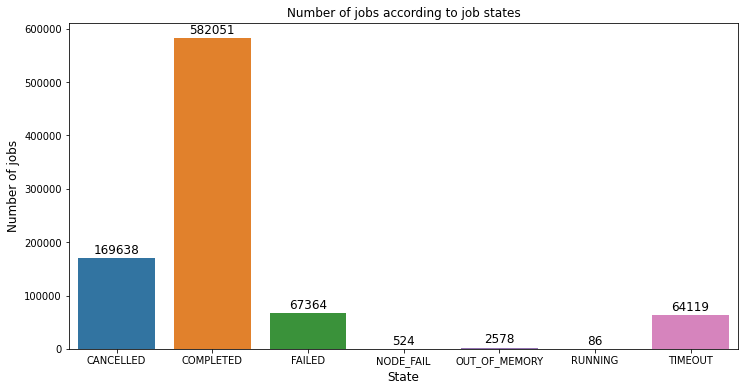

In [78]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
te = waittime.groupby(['State'], as_index=False).agg({'Jcount':'sum'})
y = sns.barplot(x ='State',y = 'Jcount',data =  te)
y.set_title("Number of jobs according to job states")
y.set_xlabel('State', size = 12)
y.set_ylabel('Number of jobs', size = 12)
for bar in y.patches:
    y.annotate(int(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
if not os.path.exists('failed_canceled_jobs'):
    os.makedirs('failed_canceled_jobs')
plt.savefig('failed_canceled_jobs/count_of_state.png')

In [79]:
canceled = waittime.loc[waittime.State == 'CANCELLED']
failed = waittime.loc[waittime.State == 'FAILED']
nodefail = waittime.loc[waittime.State == 'NODE_FAIL']

In [80]:
nodefail.head()

,UID,JobID,Account,Submittimestamp,Start,End,Eligibletimestamp,Starttimestamp,Endtimestamp,AllocNodes,AllocCPUS,TimelimitRaw,NNodes,Submit,State,ExitCode,QOS,QOSRAW,Partition,TRESAllocMem,TRESINMaxUsagemem,TotalCPUtime,JobLen,Totalres,Jcount,Waittime,year,month,yearmonth
662,170.0000,169213,81,1554389720.0000,2019-04-04 16:55:20,2019-04-04 17:19:09,1554389720.0000,1554389720.0000,1554391149.0000,1,40,20.0000,1,2019-04-04 16:55:20,NODE_FAIL,0:0,normal,1.0000,fpga,182000.0000,NaN,0.0000,1429.0000,1429.0000,1,0.0000,2019,4,2019-4
697,170.0000,169226,81,1554392473.0000,2019-04-04 17:41:13,2019-04-04 18:09:10,1554392473.0000,1554392473.0000,1554394150.0000,1,40,120.0000,1,2019-04-04 17:41:13,NODE_FAIL,0:0,normal,1.0000,fpga,182000.0000,NaN,0.0000,1677.0000,1677.0000,1,0.0000,2019,4,2019-4
9858,208.0000,172302,42,1554541016.0000,2019-04-06 10:56:56,2019-04-06 11:12:05,1554541016.0000,1554541016.0000,1554541925.0000,1,40,20.0000,1,2019-04-06 10:56:56,NODE_FAIL,0:0,cont,10.0000,fpga,182000.0000,NaN,0.0000,909.0000,909.0000,1,0.0000,2019,4,2019-4
29101,76.0000,175748,18,1554888637.0000,2019-04-10 11:31:22,2019-04-10 11:51:16,1554888637.0000,1554888682.0000,1554889876.0000,2,80,20.0000,2,2019-04-10 11:30:37,NODE_FAIL,0:0,cont,10.0000,fpga,364000.0000,NaN,0.0000,1194.0000,2388.0000,1,45.0000,2019,4,2019-4
29300,76.0000,175818,18,1554892174.0000,2019-04-10 14:05:31,2019-04-10 14:13:39,1554892174.0000,1554897931.0000,1554898419.0000,2,80,20.0000,2,2019-04-10 12:29:34,NODE_FAIL,0:0,cont,10.0000,fpga,364000.0000,NaN,0.0000,488.0000,976.0000,1,5757.0000,2019,4,2019-4


# Failed jobs every year for different projects

In [92]:
def functionf(account):
    varlist = []
    for a in account:
        temp = waittime.loc[waittime.Account == a]
        temp1 = temp.groupby(['year'], as_index=False).agg({'Jcount':'sum'})
        temp1 = temp1.sort_values('year')
        temp2 = temp.loc[temp.State == 'FAILED']
        temp2 = temp2.groupby(['year'], as_index=False).agg({'Jcount':'sum'})
        temp2 = temp2.sort_values('year')
        fig = plt.figure() # Create matplotlib figure
        ax = fig.add_subplot(111)
        ax.set_title("Total and failed jobs every year for the account {}".format(a,size=18))
        width = .2 
        num1 = list(temp1.year)
        num2 = list(temp2.year)
        
        ax.bar(num1, temp1.Jcount.squeeze(), width, color='g',alpha = 0.5) 
        ax.bar(num2, temp2.Jcount.squeeze(),width, color='b',alpha = 0.5)
        fig.set_figheight(5)
        fig.set_figwidth(10)
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.005),fontsize=12)
        ax.set_xlabel('Year', fontsize=14)
        ax.set_ylabel('Number of jobs', fontsize=14)
        plt.show()
        if not os.path.exists('failed_canceled_jobs'):
            os.makedirs('failed_canceled_jobs')
        fig.savefig('failed_canceled_jobs/{}_failed_cjobs.png'.format(a),bbox_inches='tight', dpi=100)
                
            

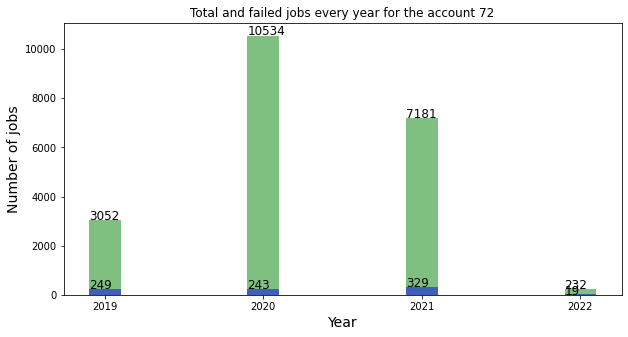

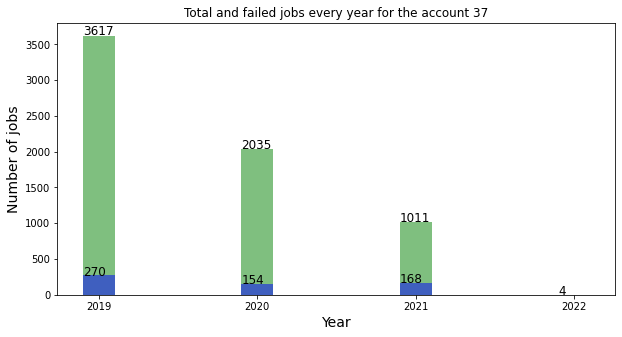

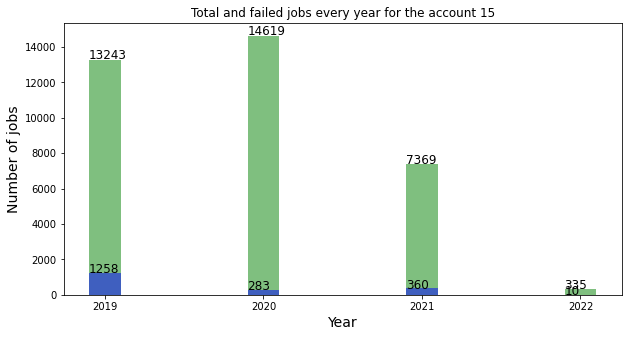

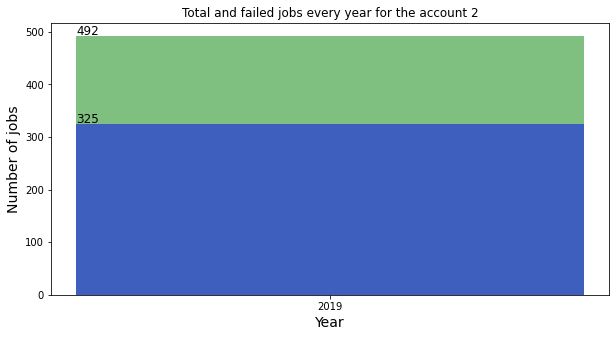

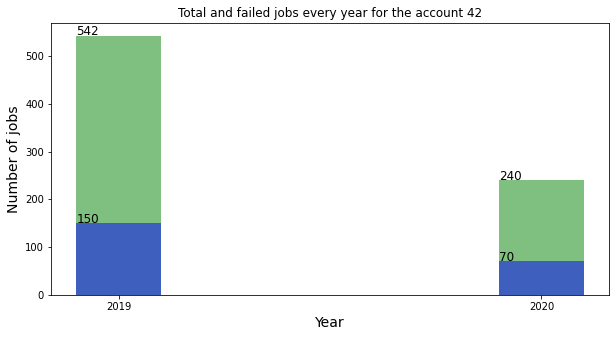

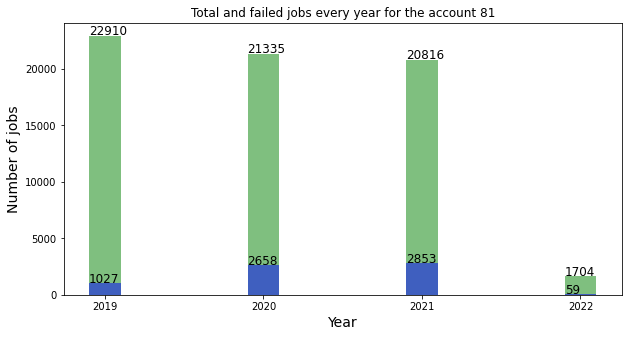

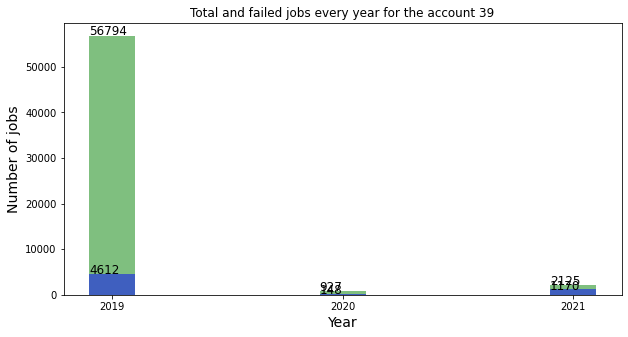

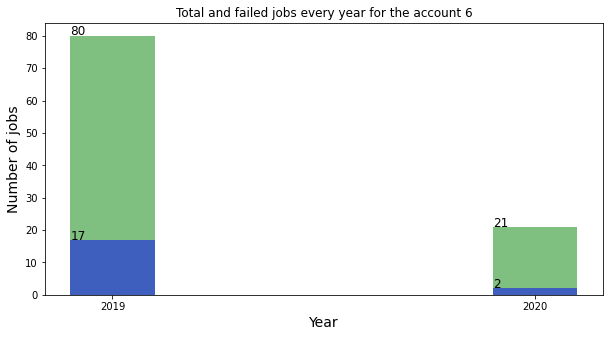

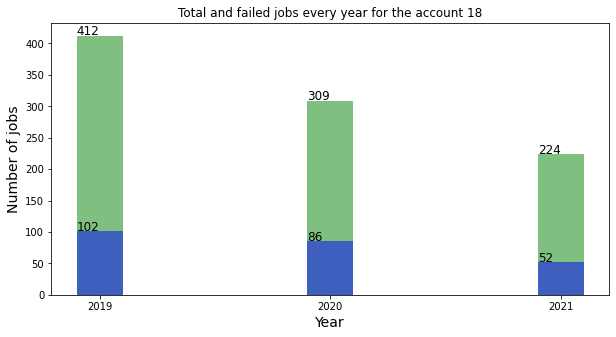

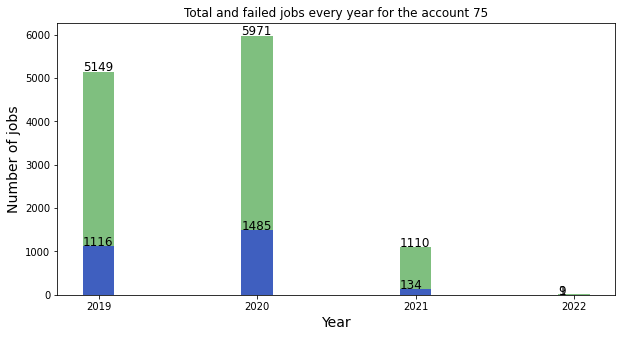

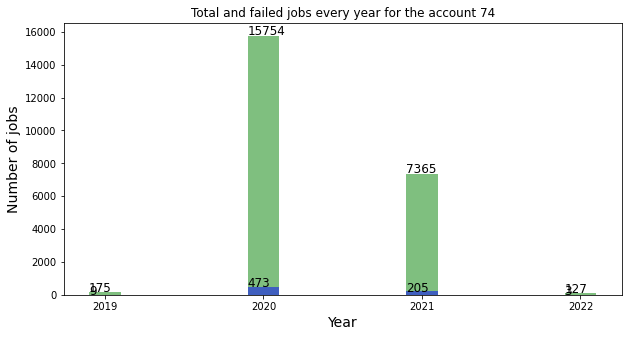

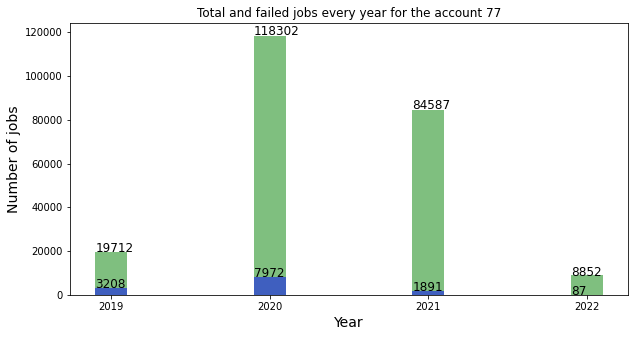

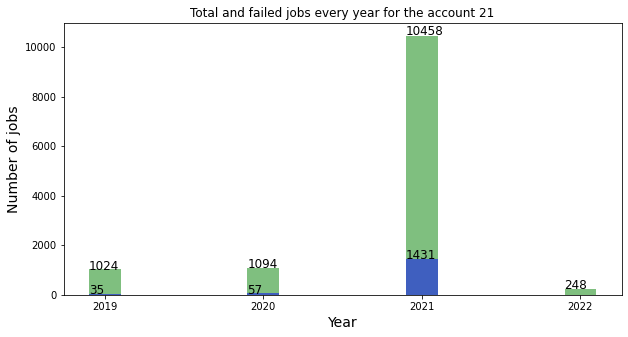

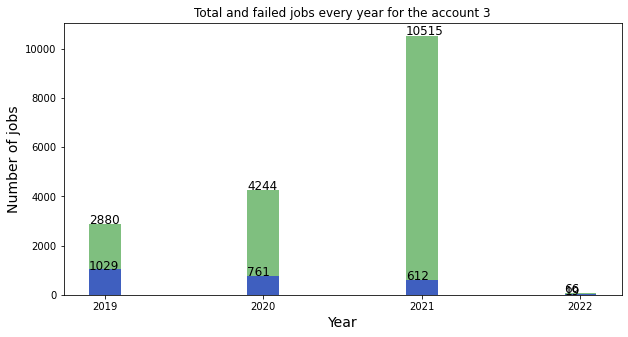

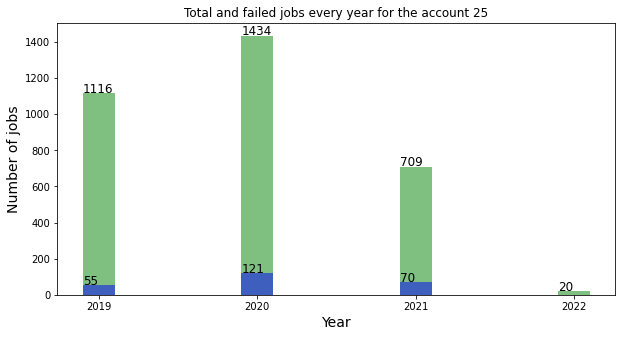

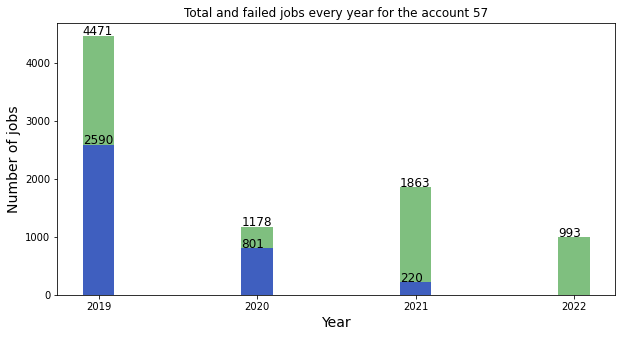

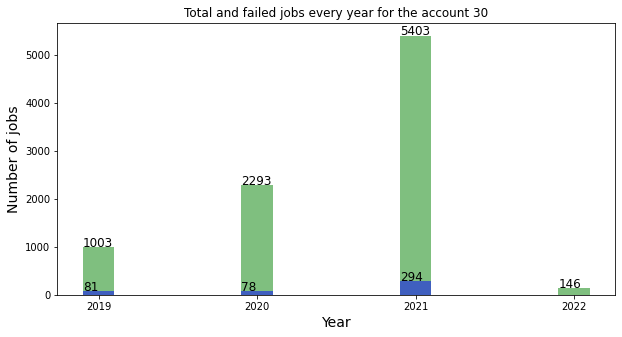

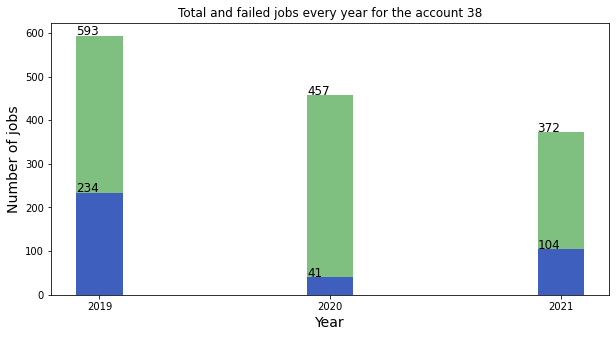

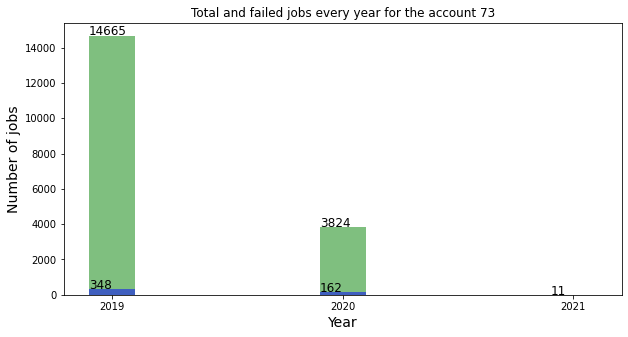

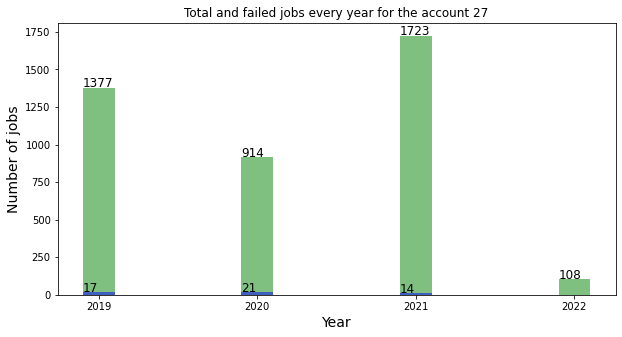

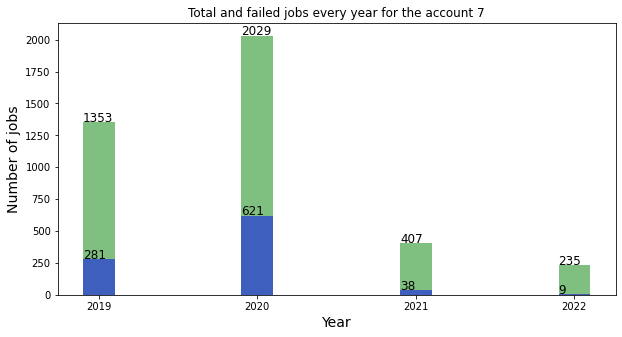

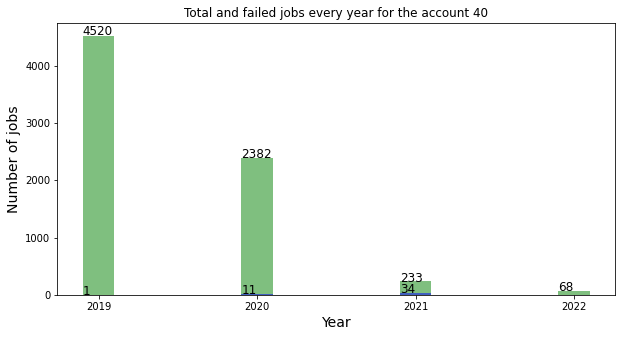

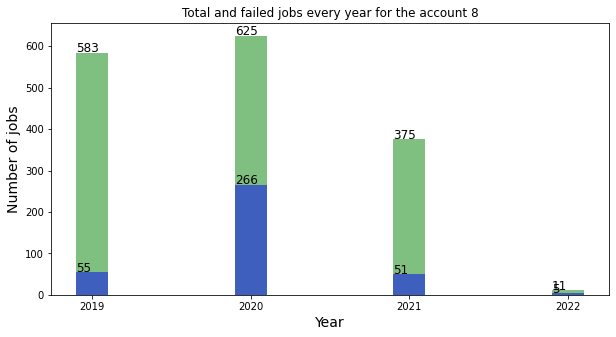

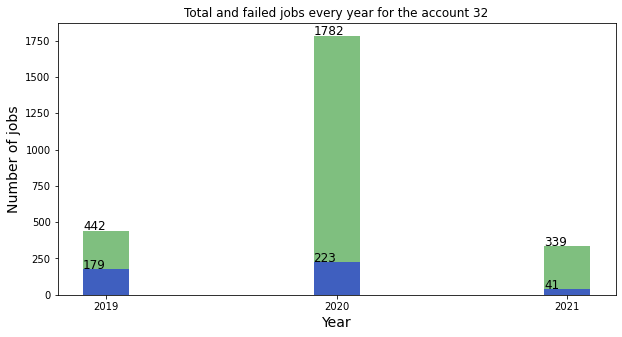

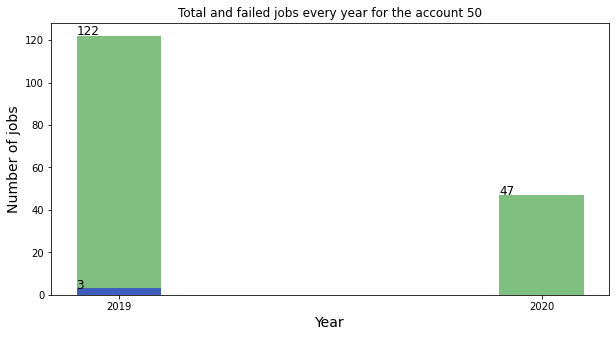

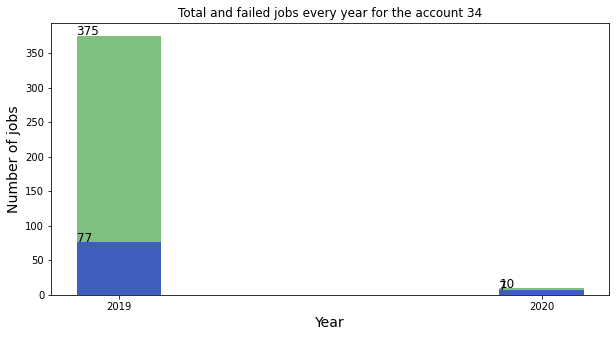

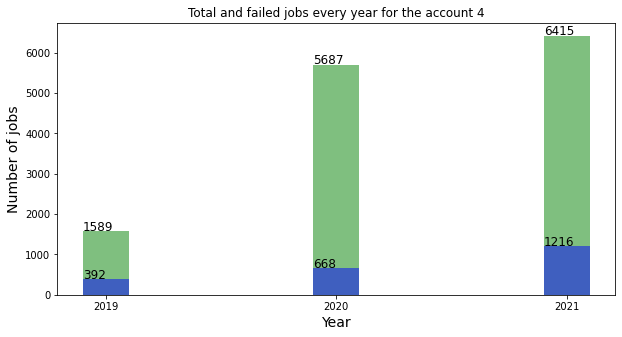

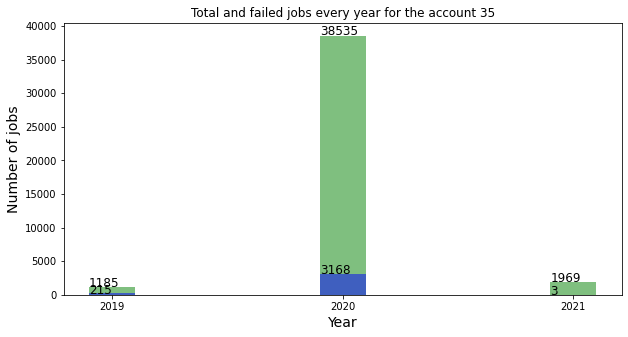

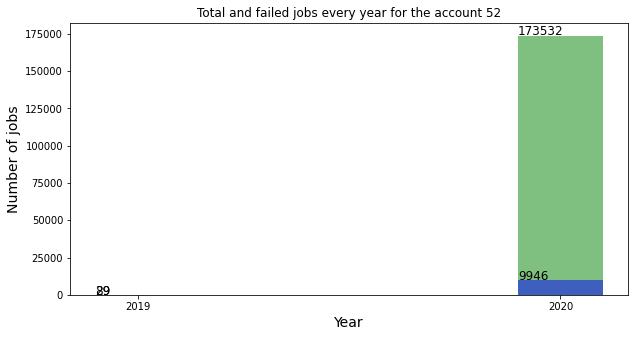

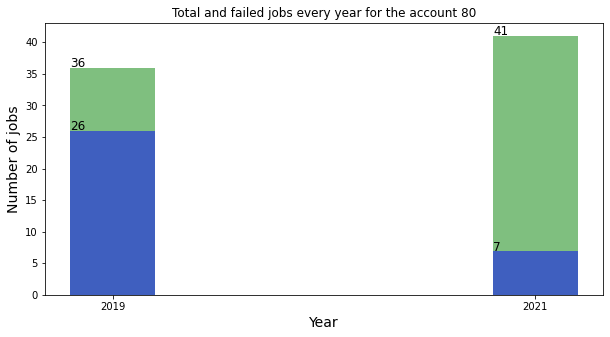

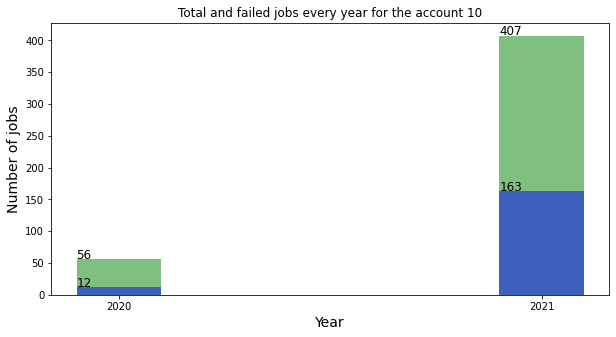

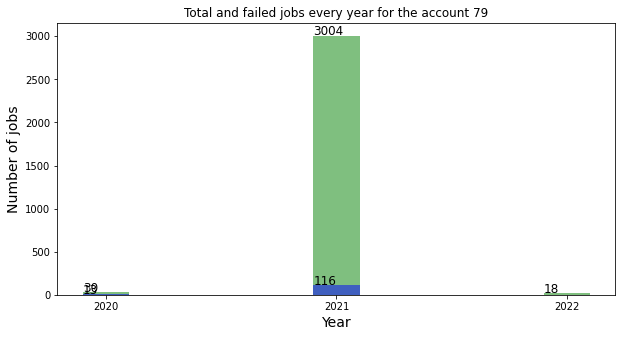

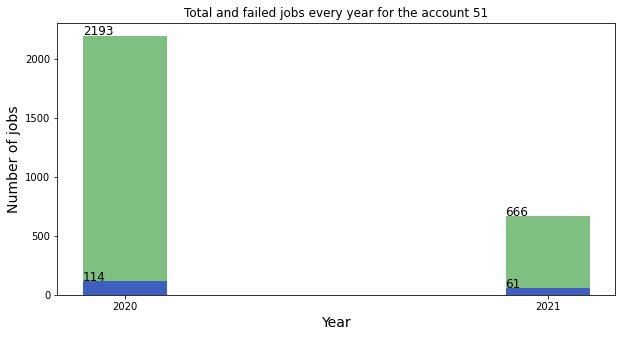

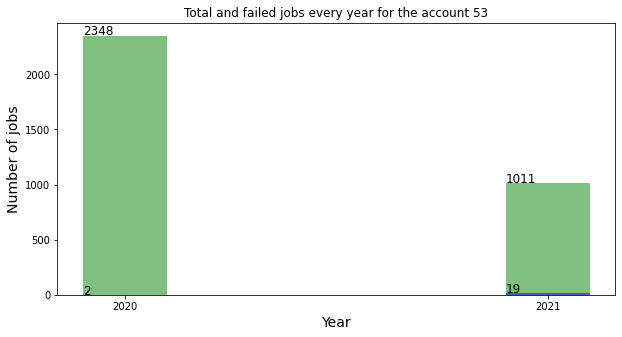

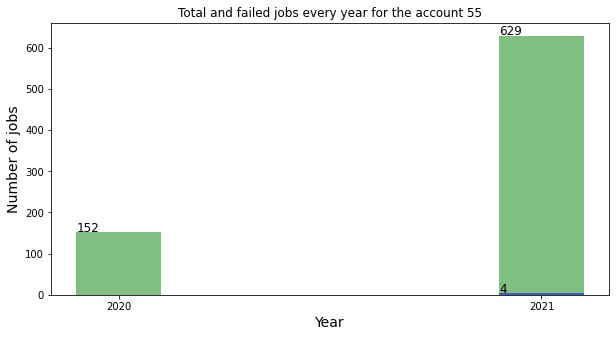

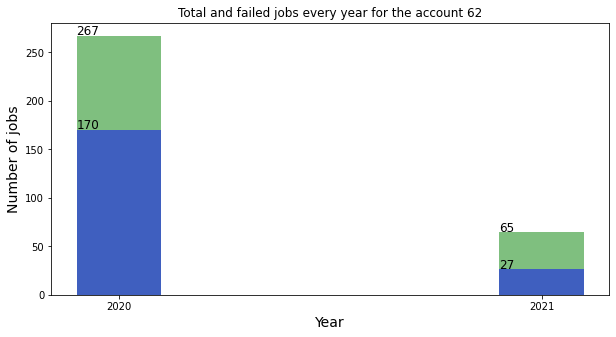

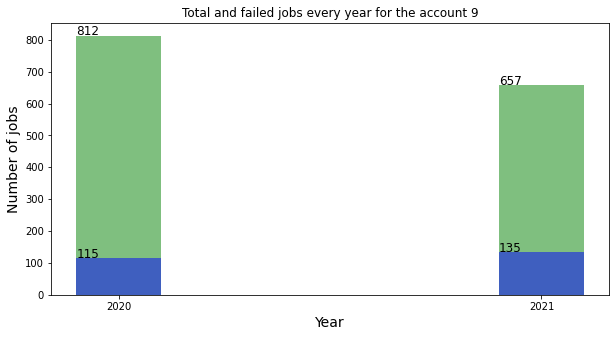

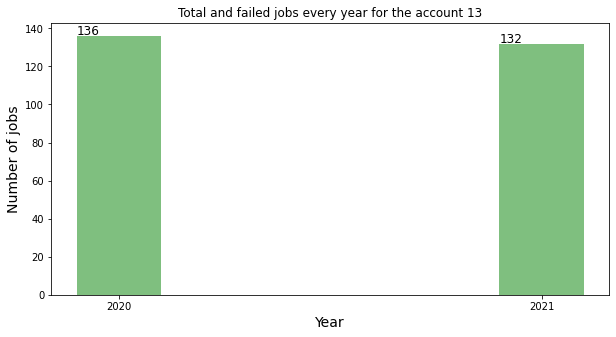

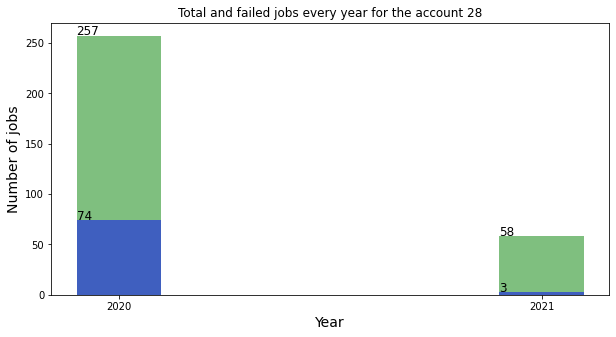

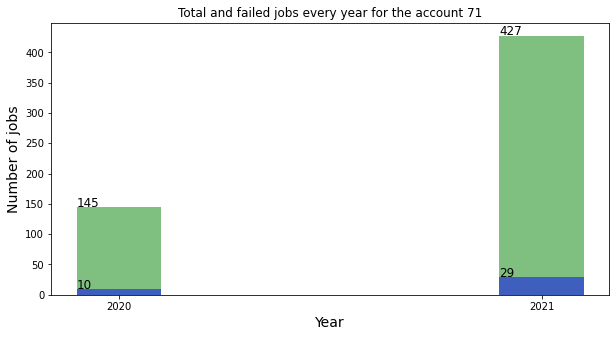

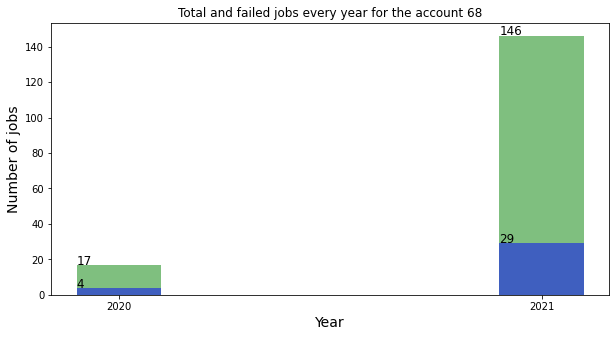

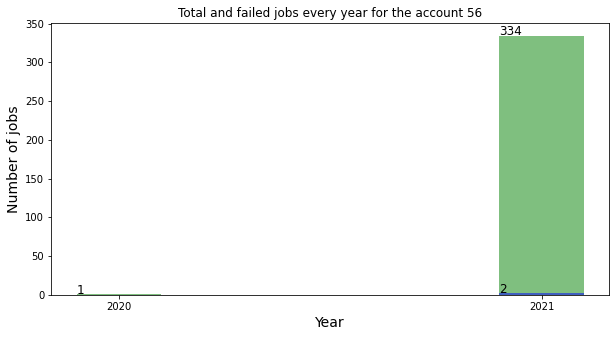

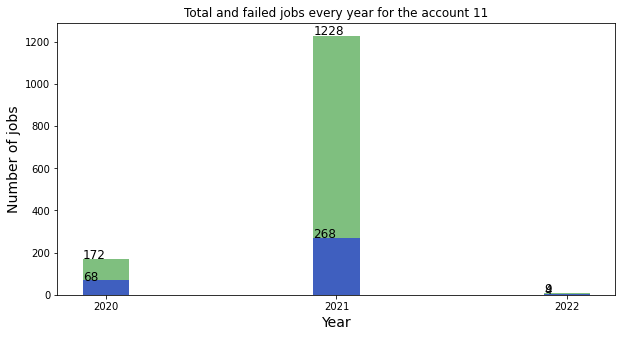

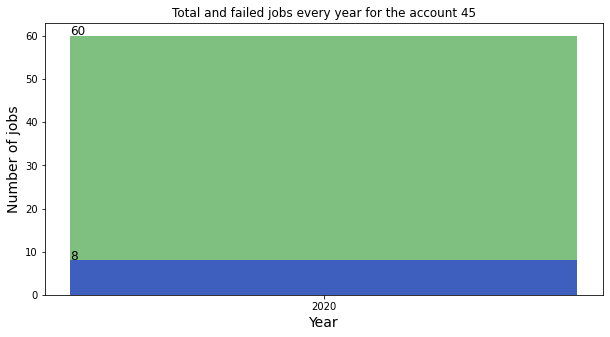

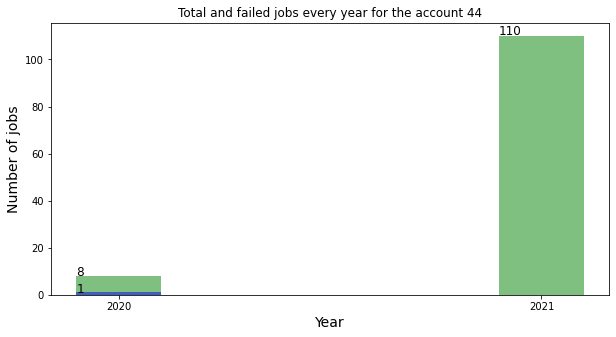

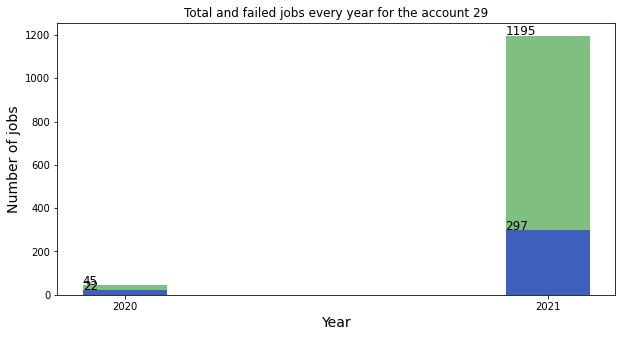

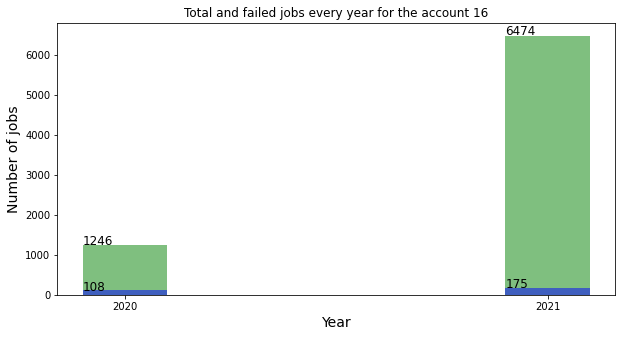

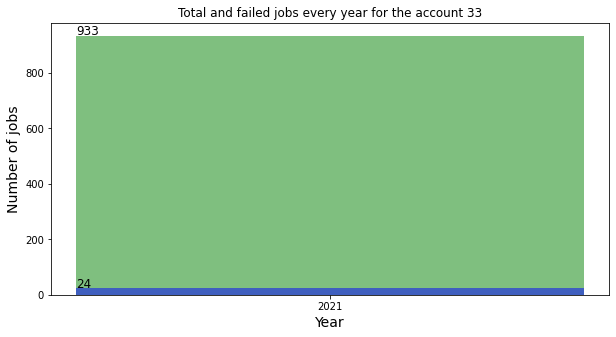

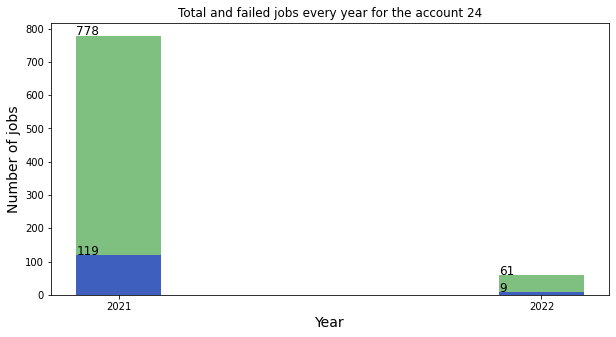

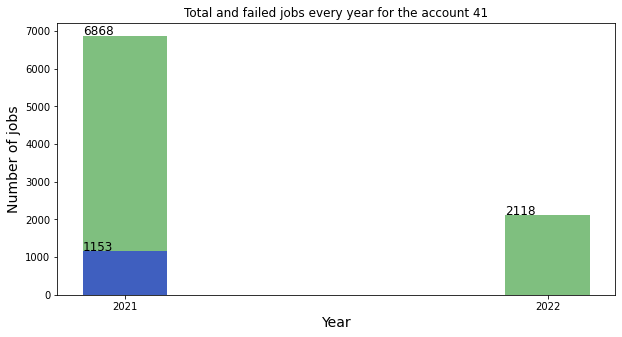

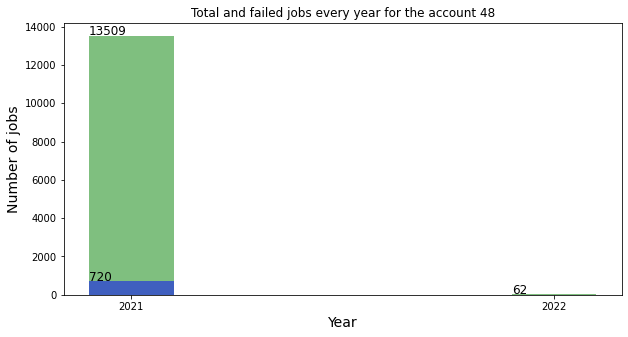

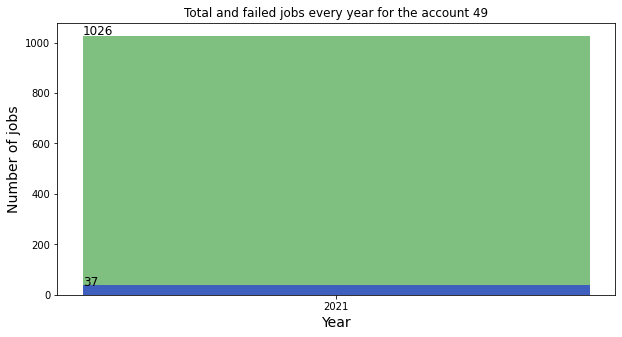

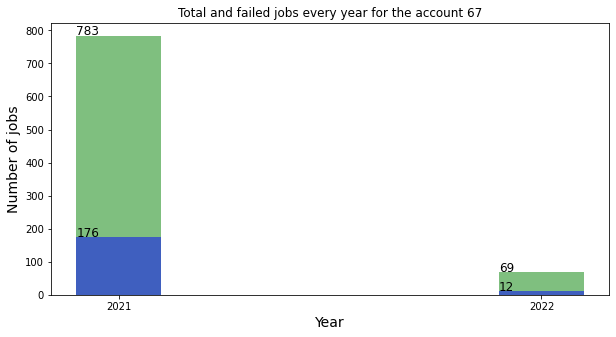

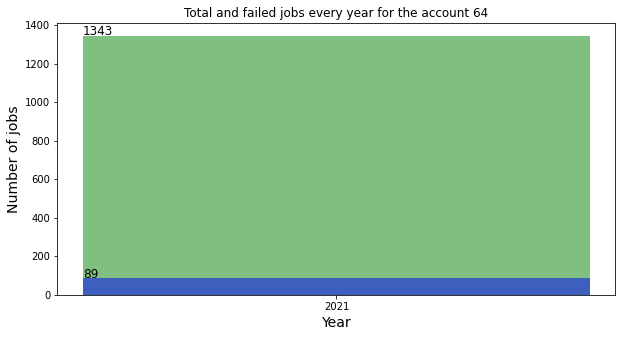

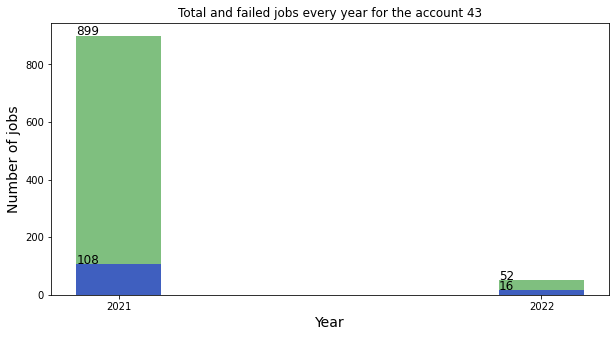

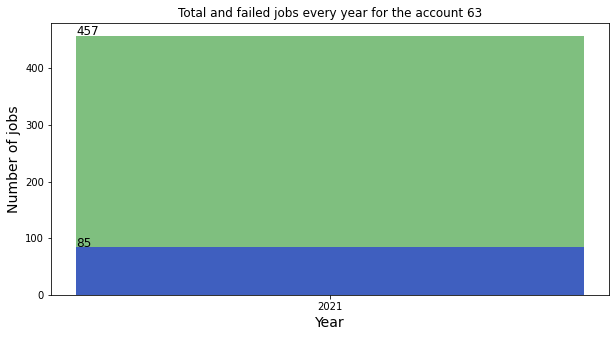

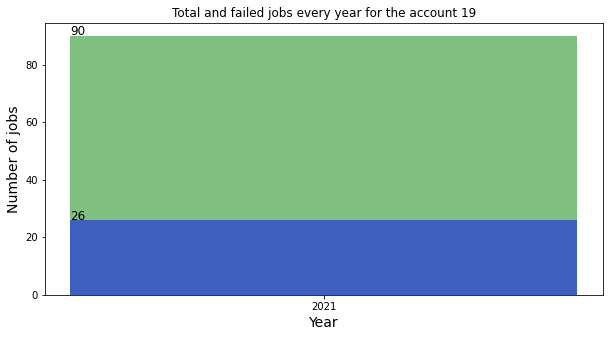

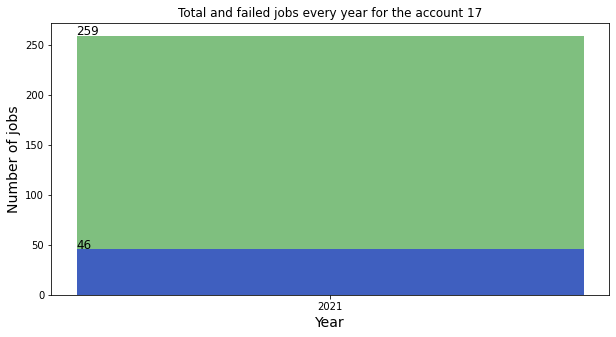

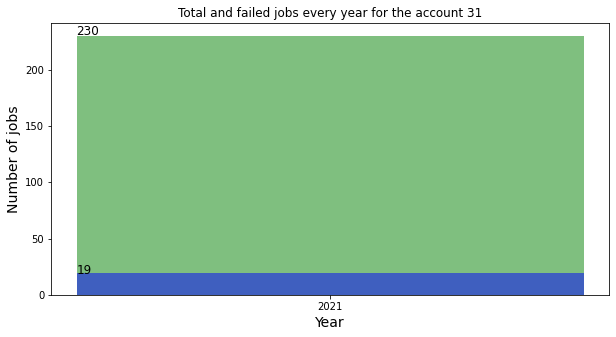

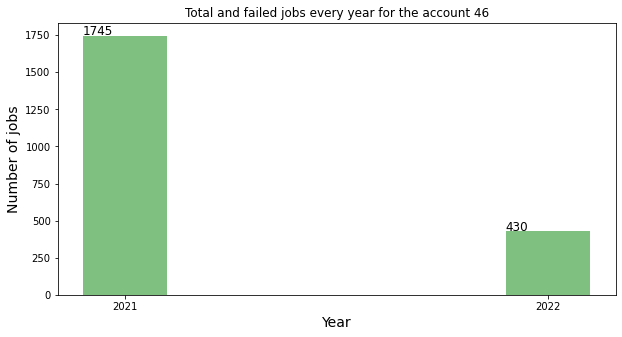

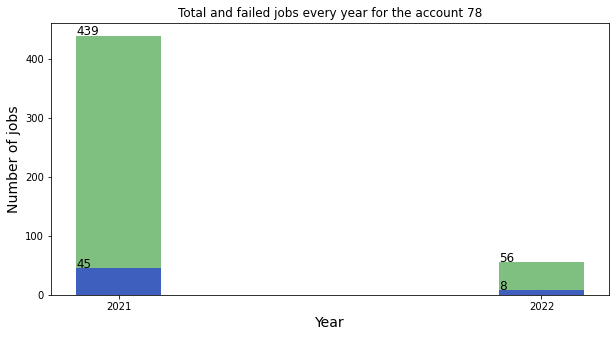

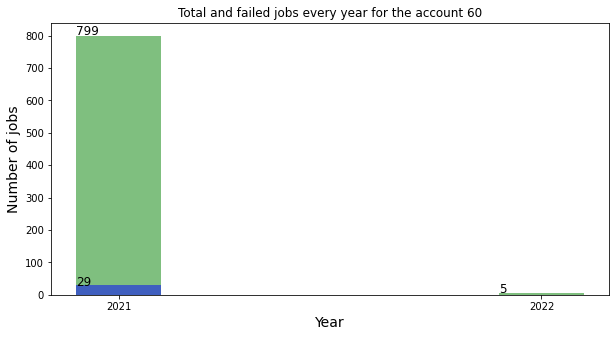

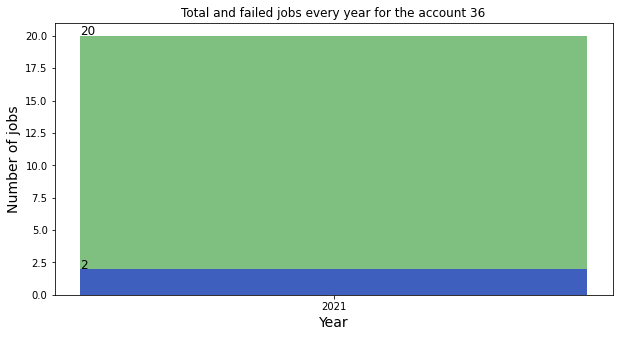

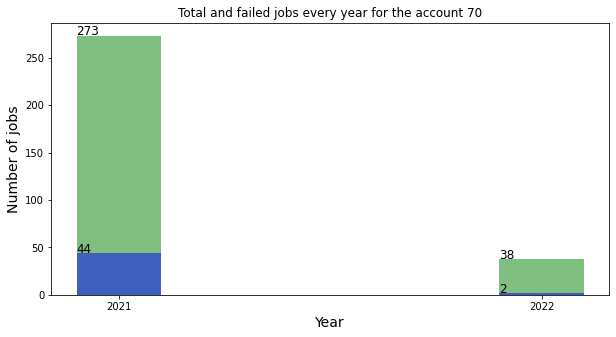

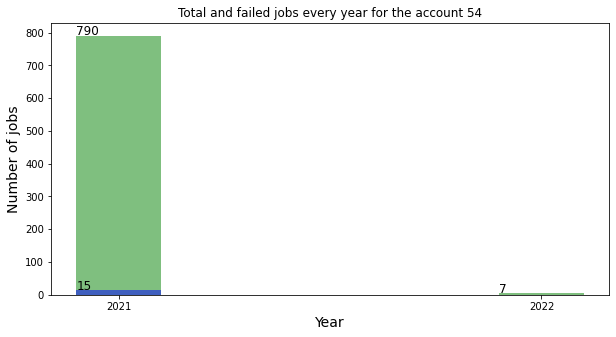

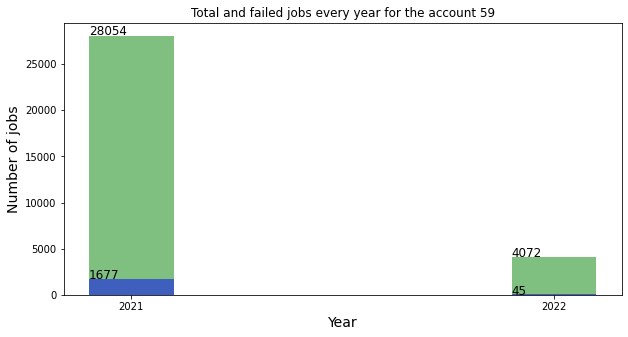

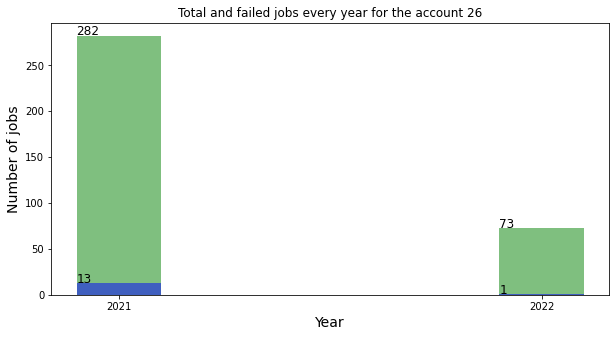

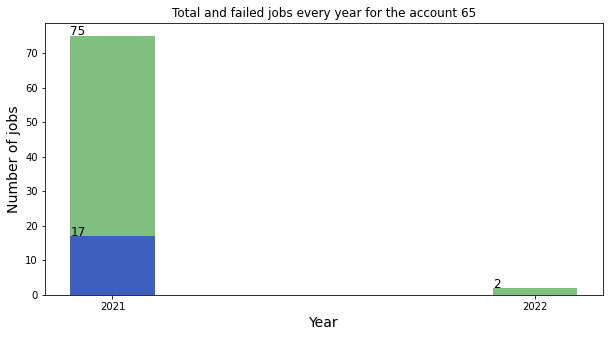

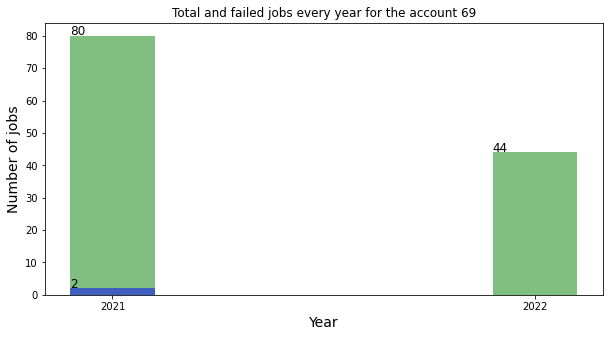

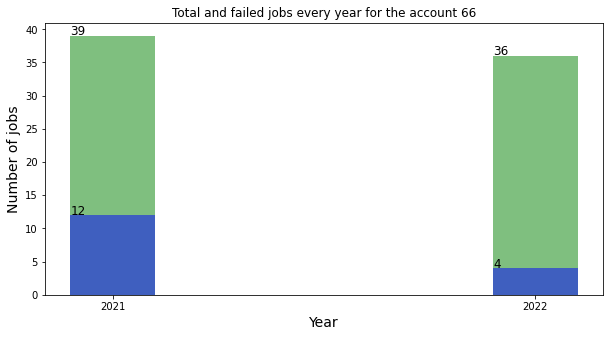

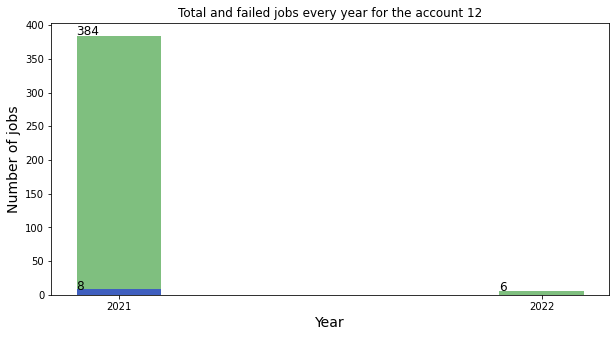

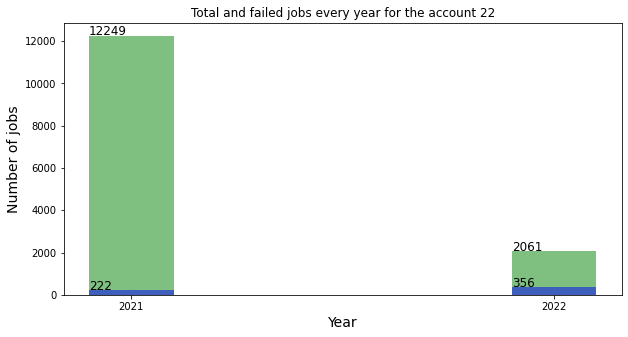

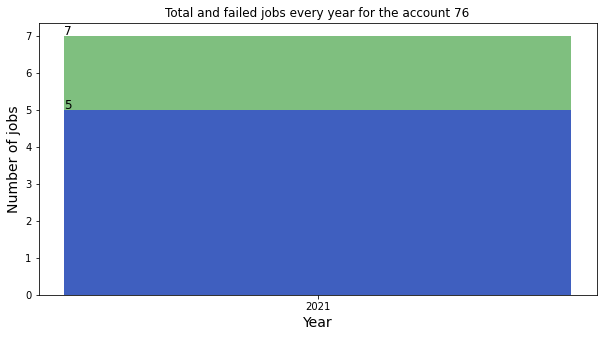

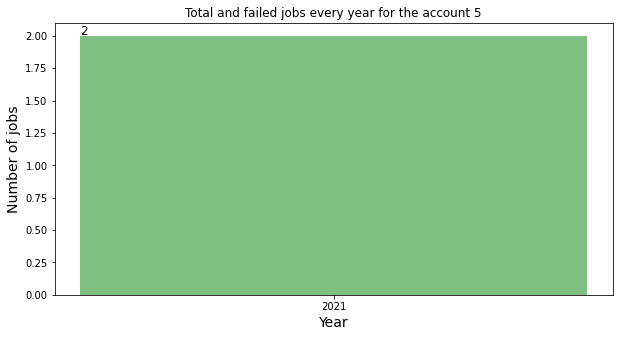

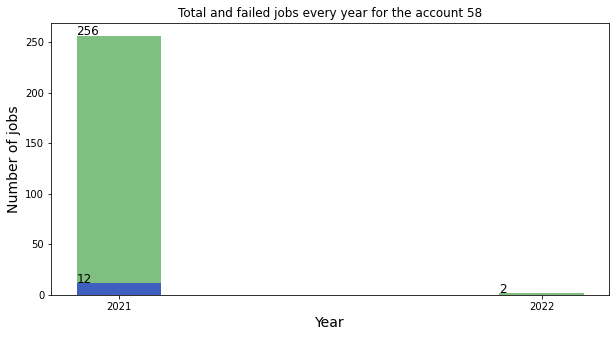

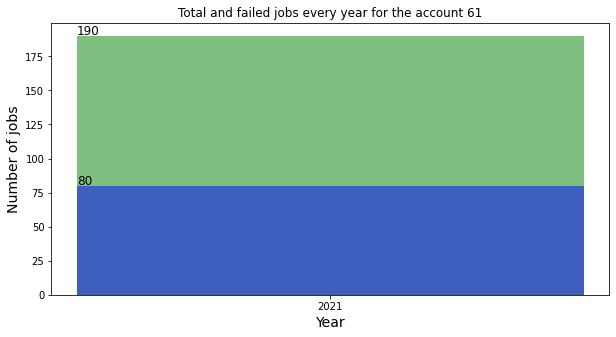

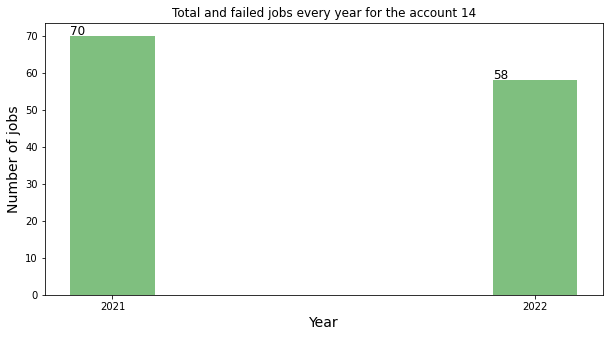

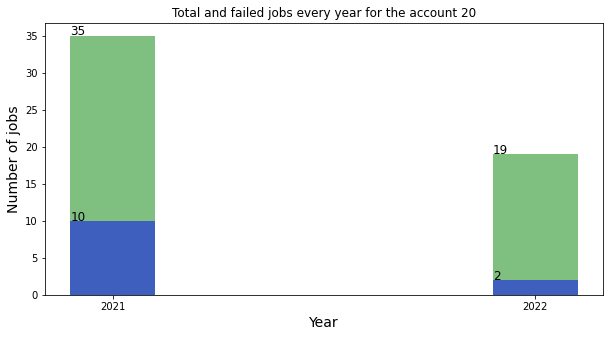

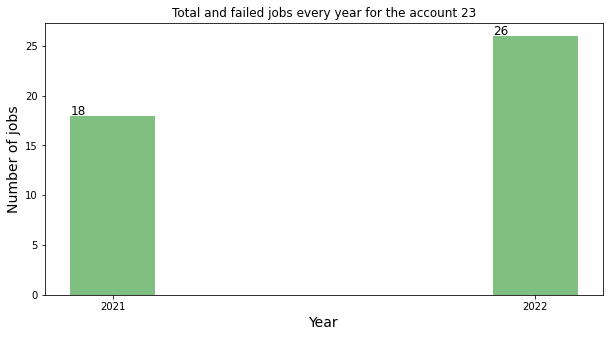

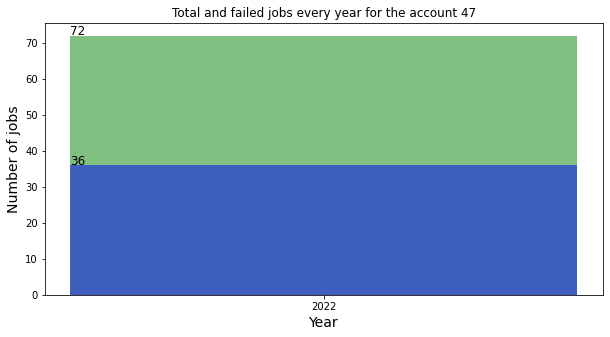

In [93]:
account = waittime['Account'].unique()
account = account.tolist()
functionf(account)

# Canceled jobs every year for different projects

In [94]:
def functionc(account):
    varlist = []
    for a in account:
        temp = waittime.loc[waittime.Account == a]
        temp1 = temp.groupby(['year'], as_index=False).agg({'Jcount':'sum'})
        temp1 = temp1.sort_values('year')
        temp2 = temp.loc[temp.State == 'CANCELLED']
        temp2 = temp2.groupby(['year'], as_index=False).agg({'Jcount':'sum'})
        temp2 = temp2.sort_values('year')
        fig = plt.figure() # Create matplotlib figure
        ax = fig.add_subplot(111)
        ax.set_title("Total and Canceled jobs every year for the account {}".format(a,size=18))
        width = .2 
        num1 = list(temp1.year)
        num2 = list(temp2.year)
        
        ax.bar(num1, temp1.Jcount.squeeze(), width, color='g',alpha = 0.5) 
        ax.bar(num2, temp2.Jcount.squeeze(),width, color='b', alpha = 0.5)
        fig.set_figheight(10)
        fig.set_figwidth(10)
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.005),fontsize=12)
        ax.set_xlabel('Year', fontsize=14)
        ax.set_ylabel('Number of jobs', fontsize=14)
        plt.show()
        if not os.path.exists('failed_canceled_jobs'):
            os.makedirs('failed_canceled_jobs')
        fig.savefig('failed_canceled_jobs/{}_canceled_jobs.png'.format(a),bbox_inches='tight', dpi=100)
                
            

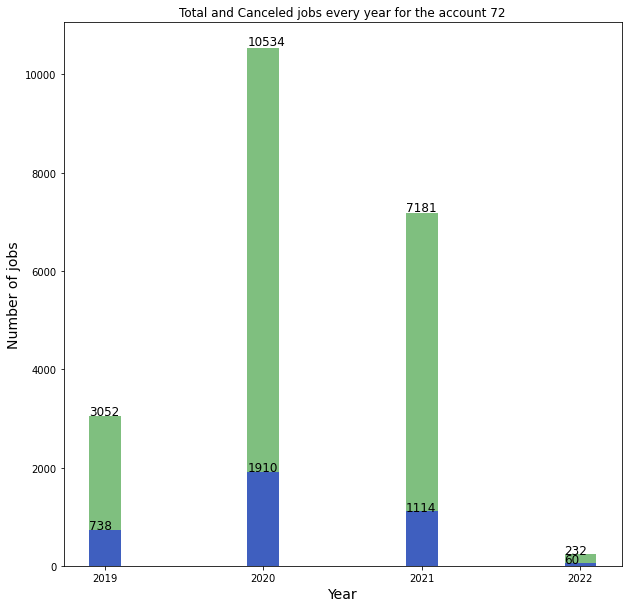

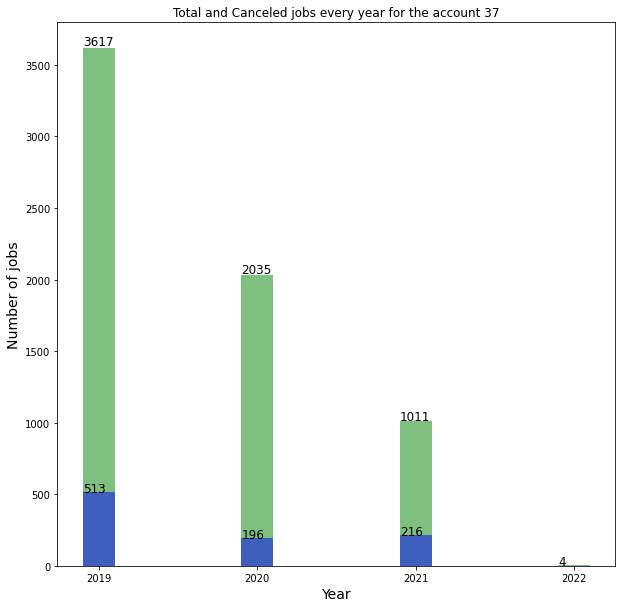

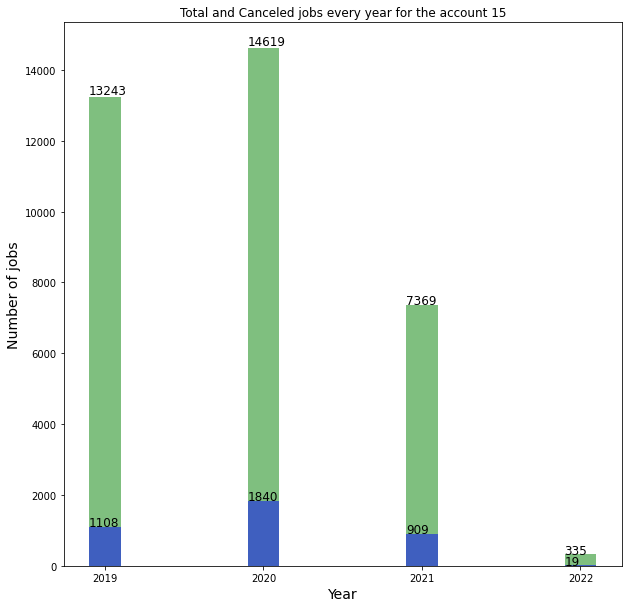

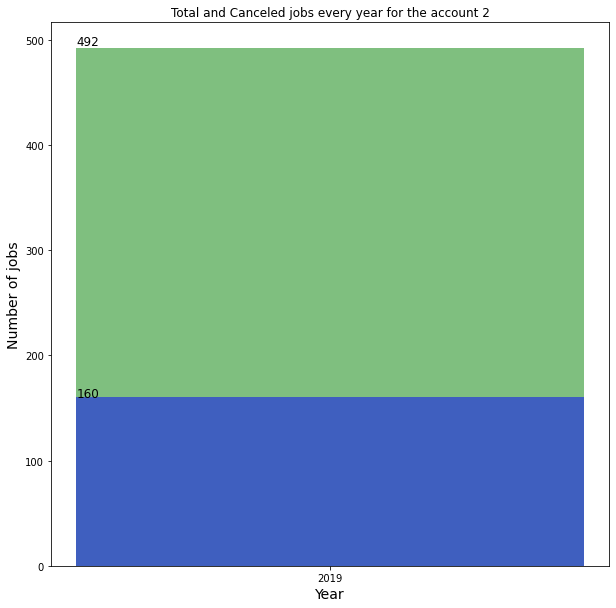

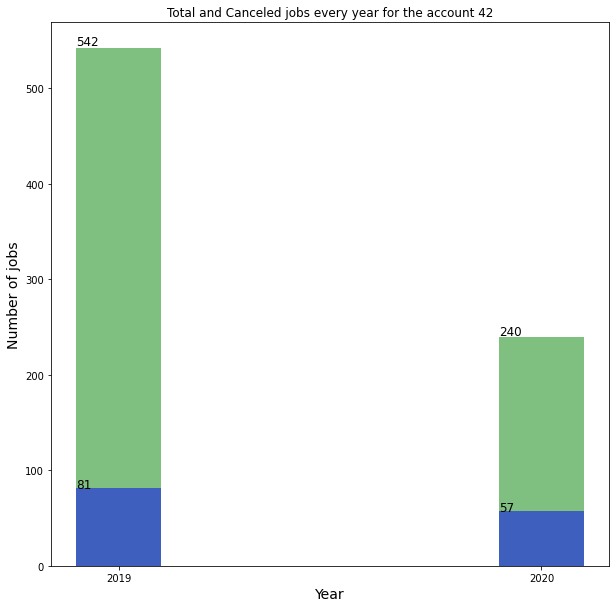

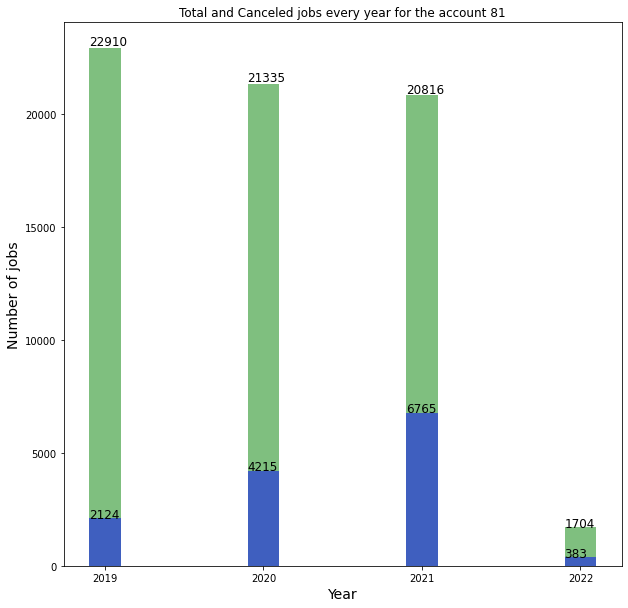

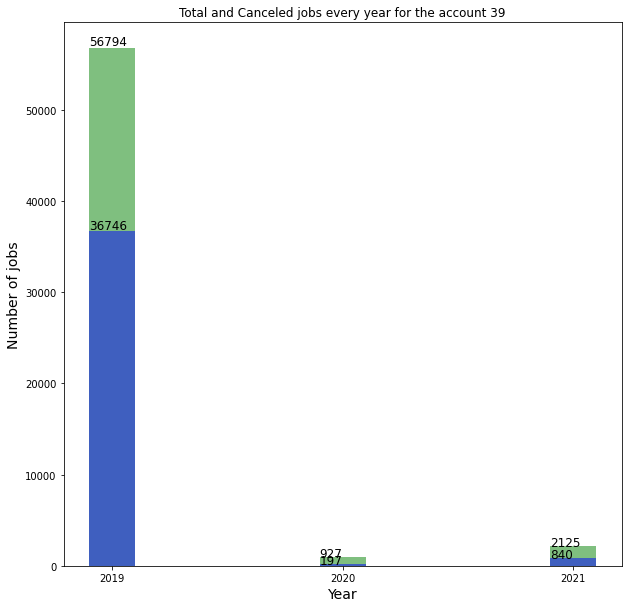

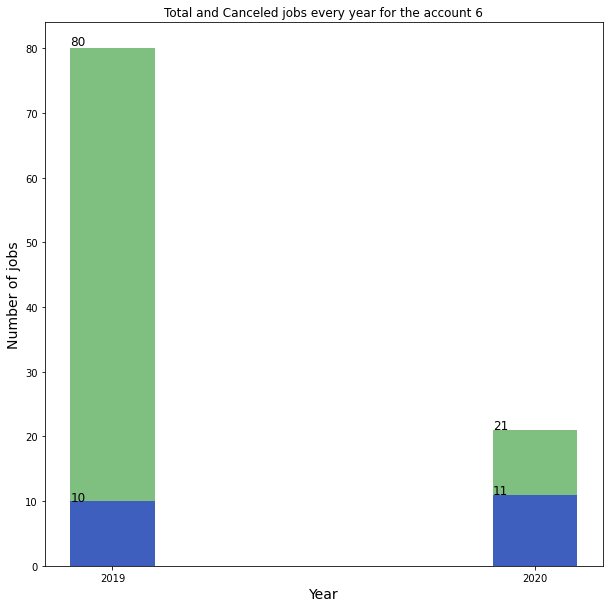

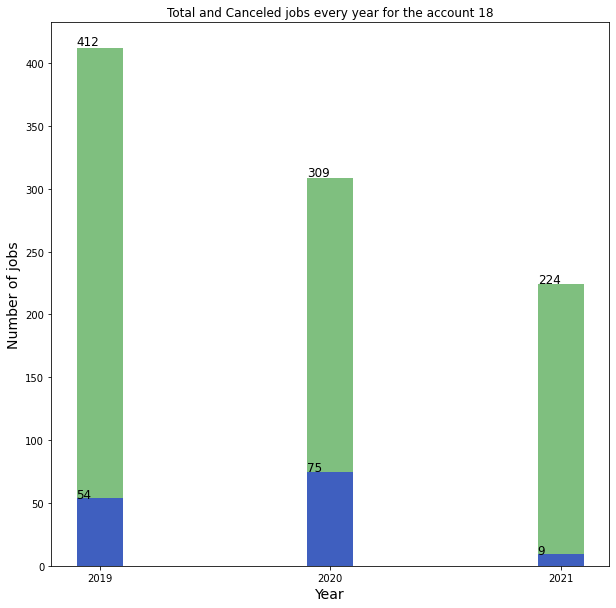

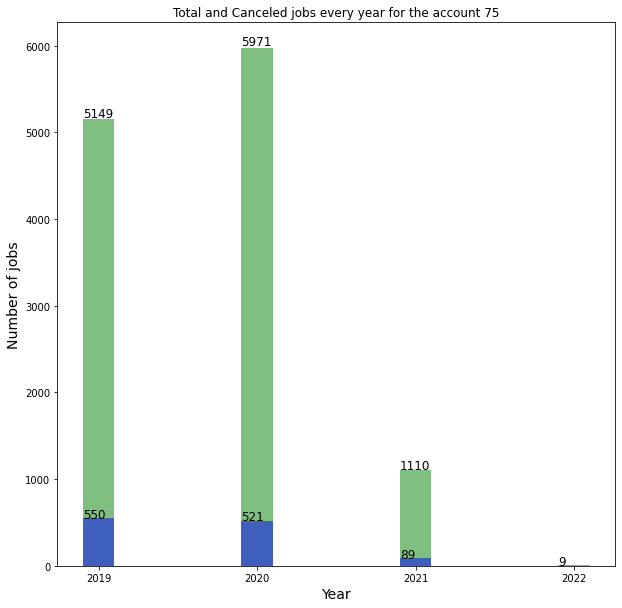

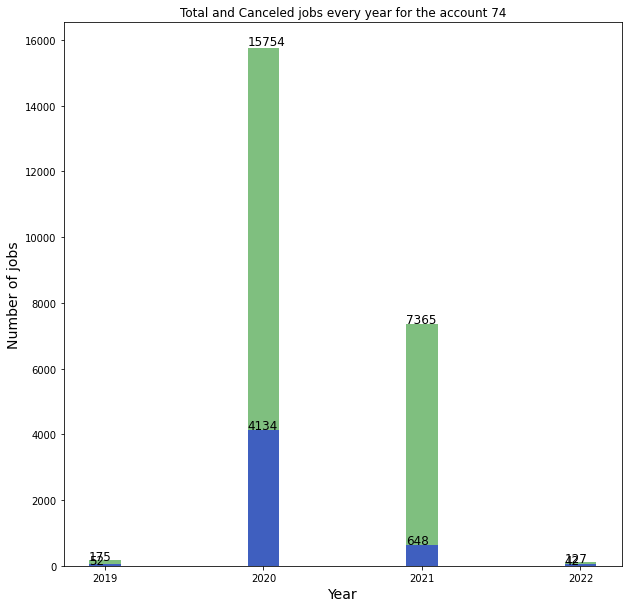

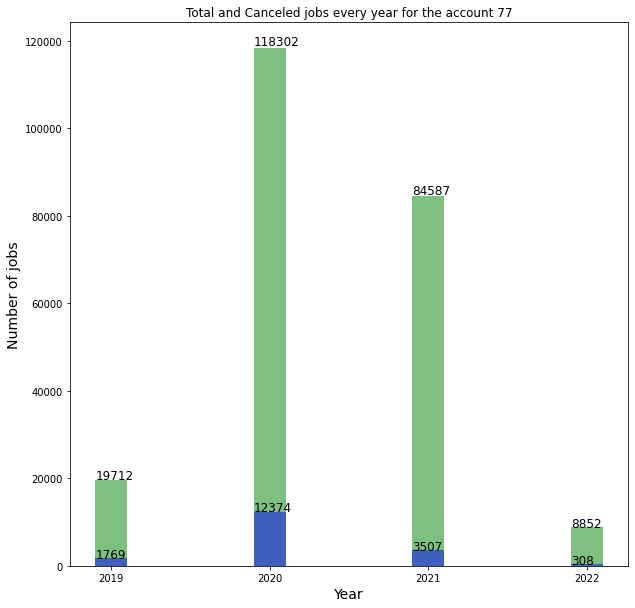

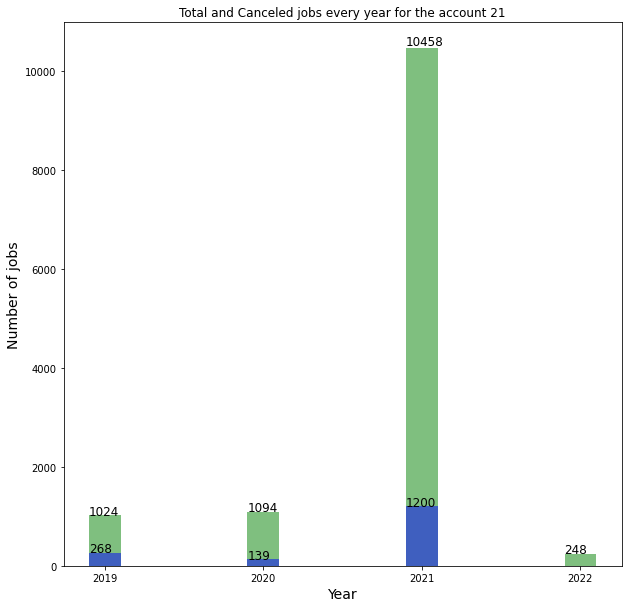

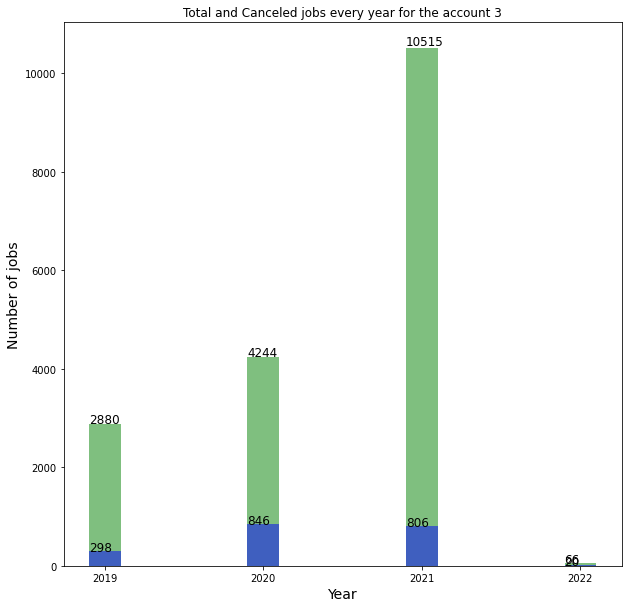

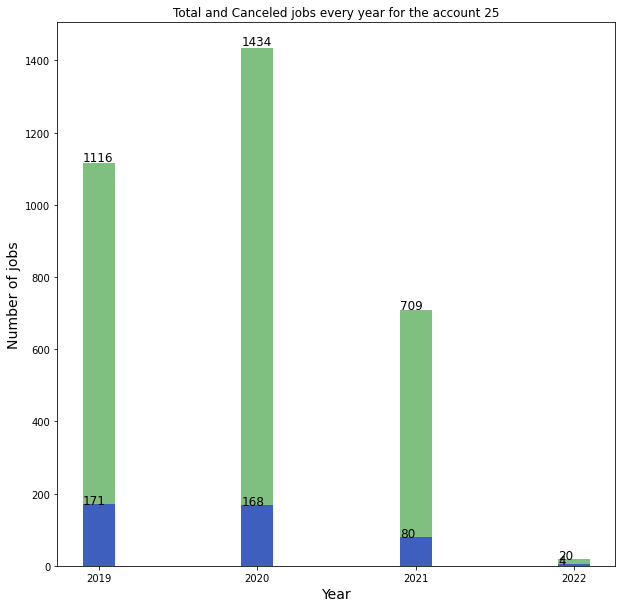

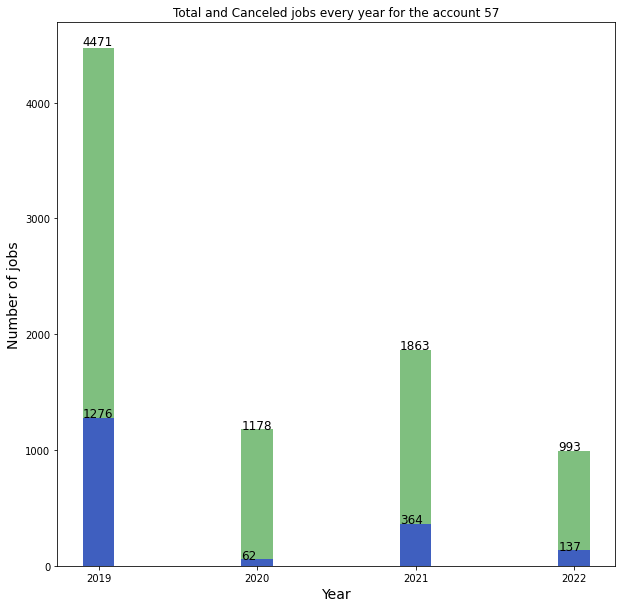

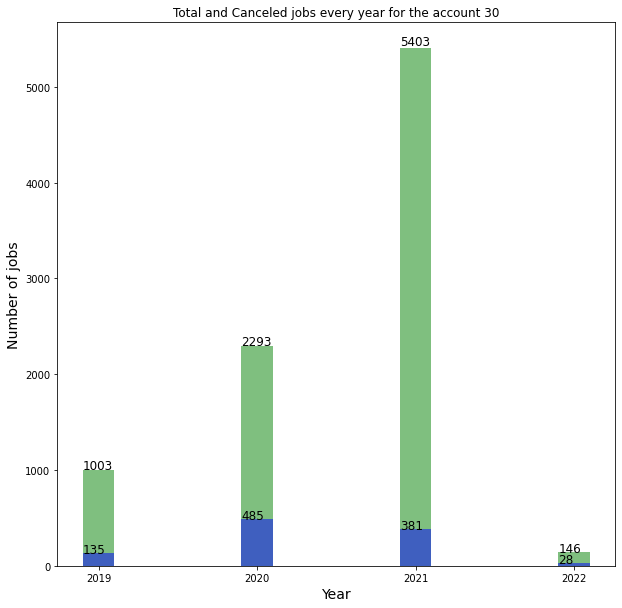

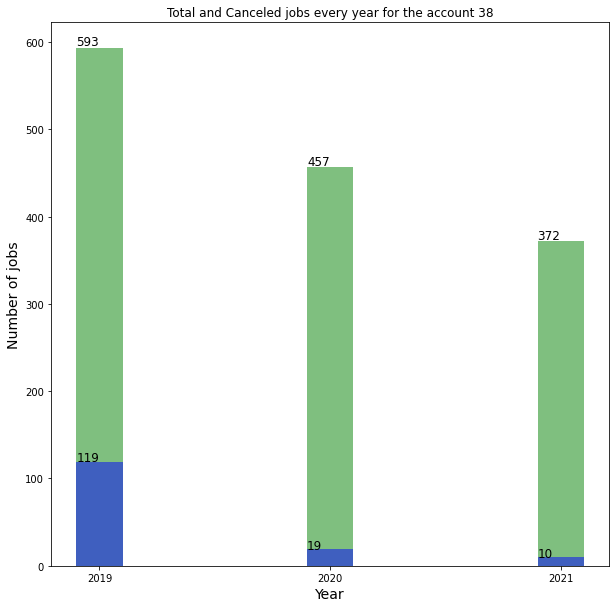

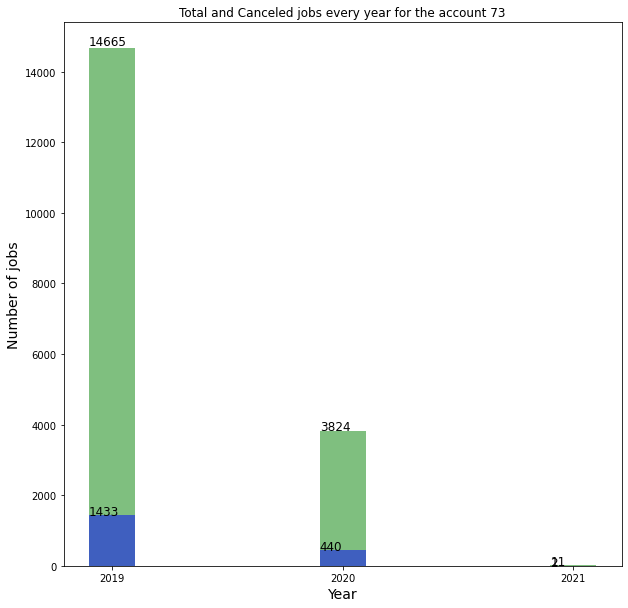

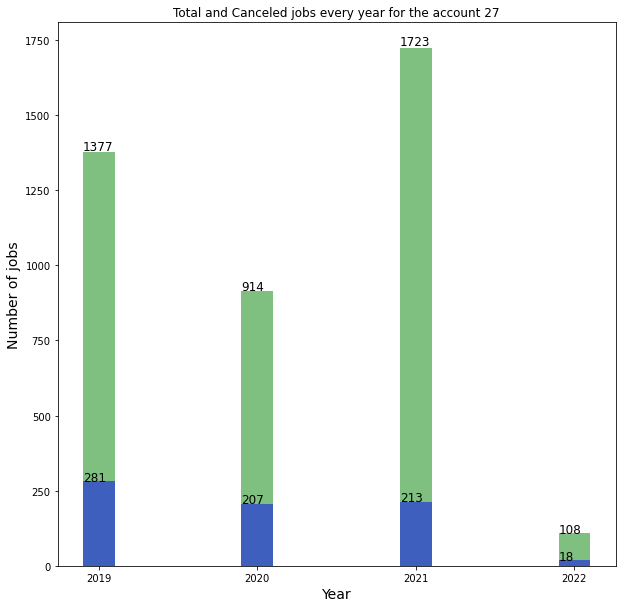

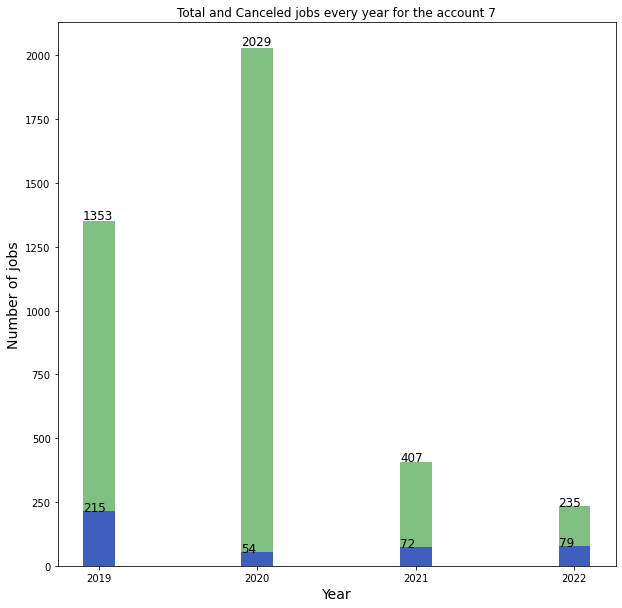

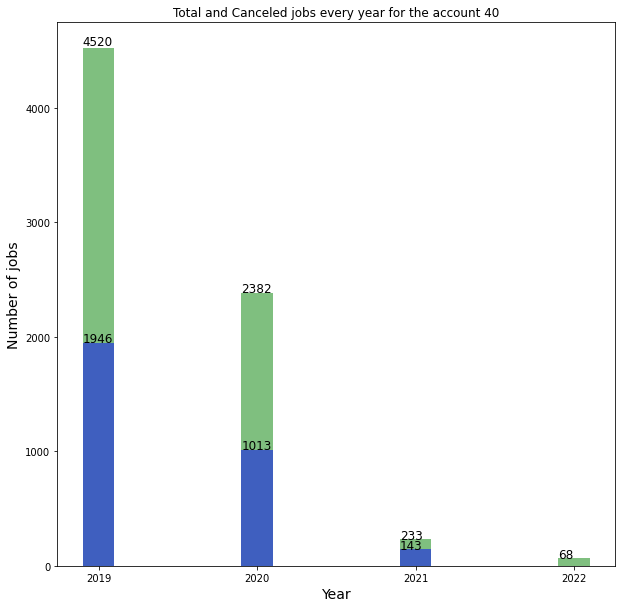

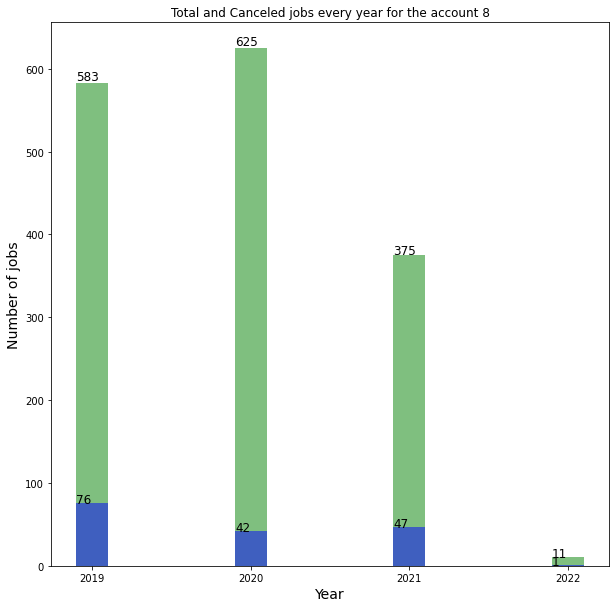

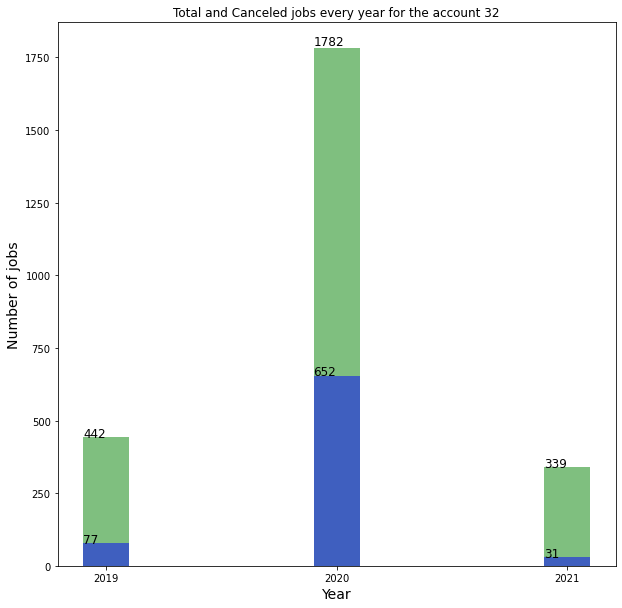

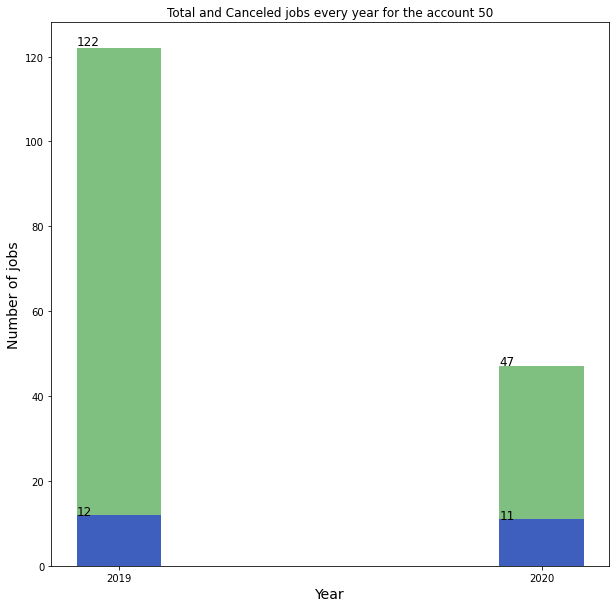

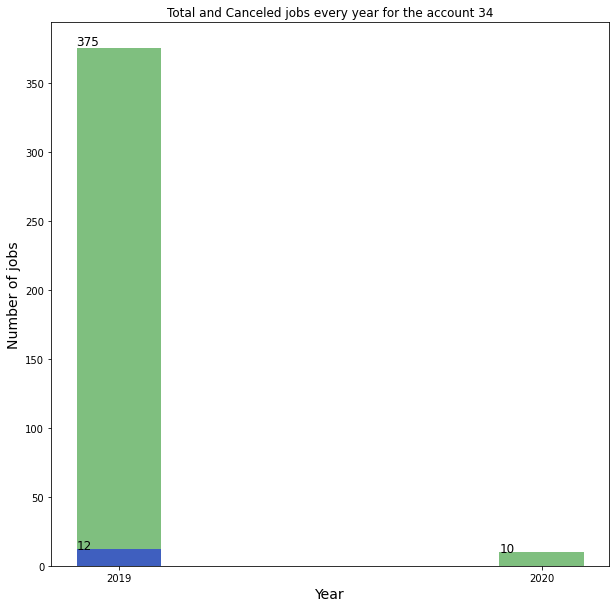

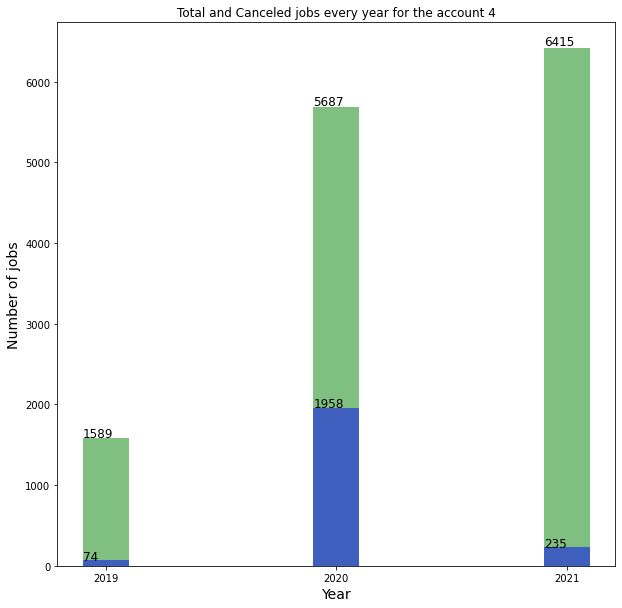

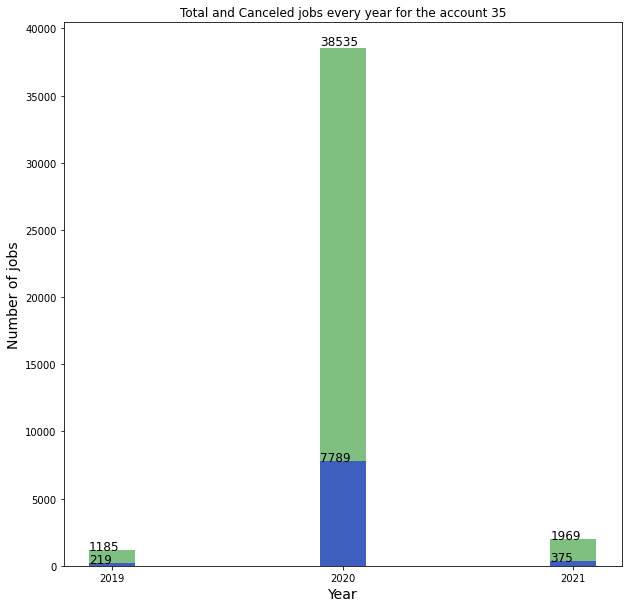

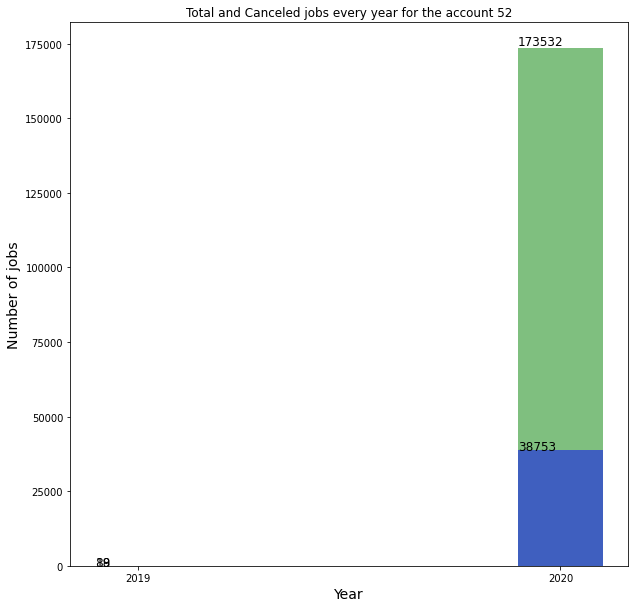

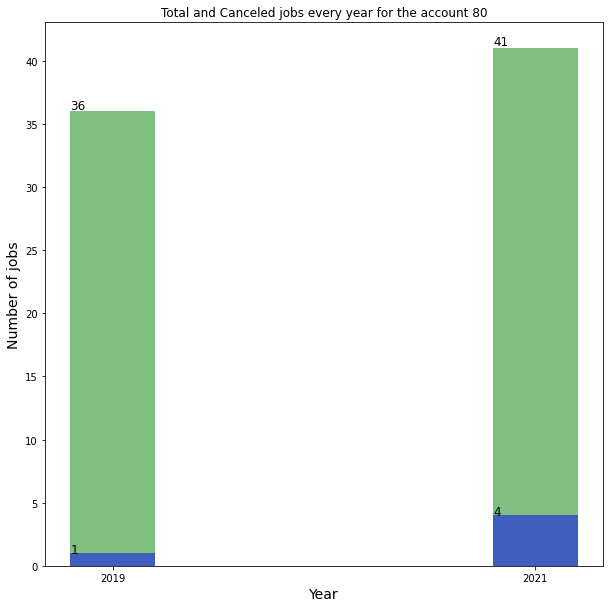

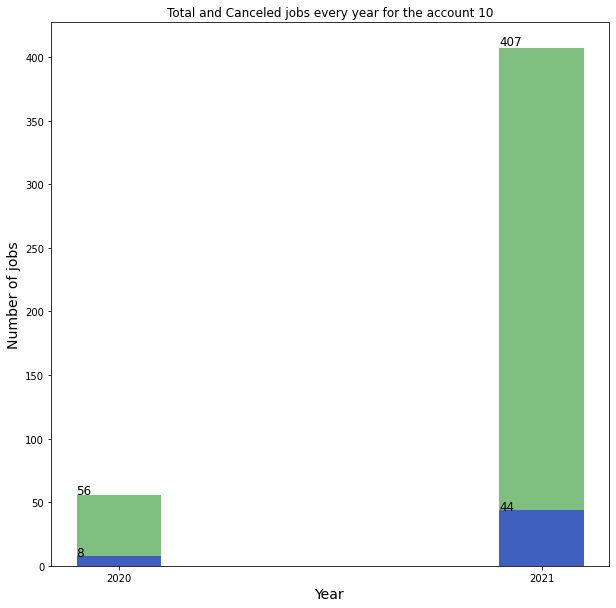

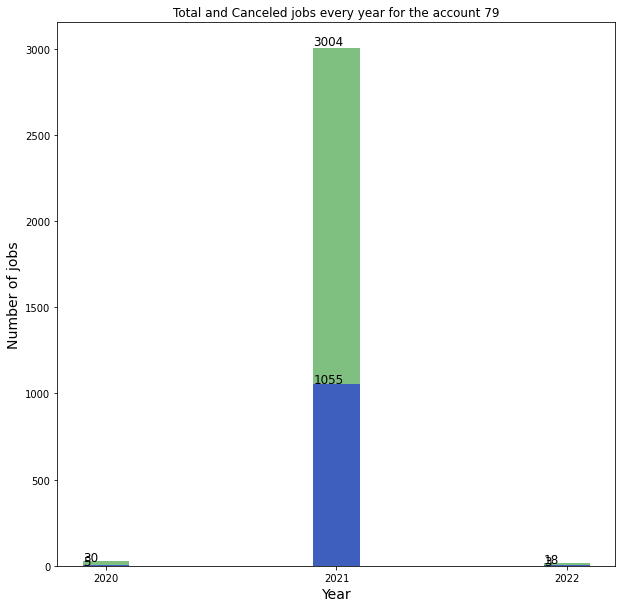

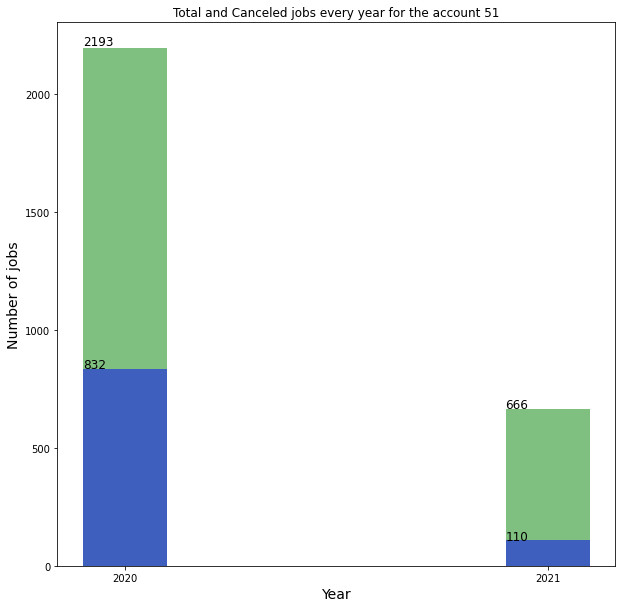

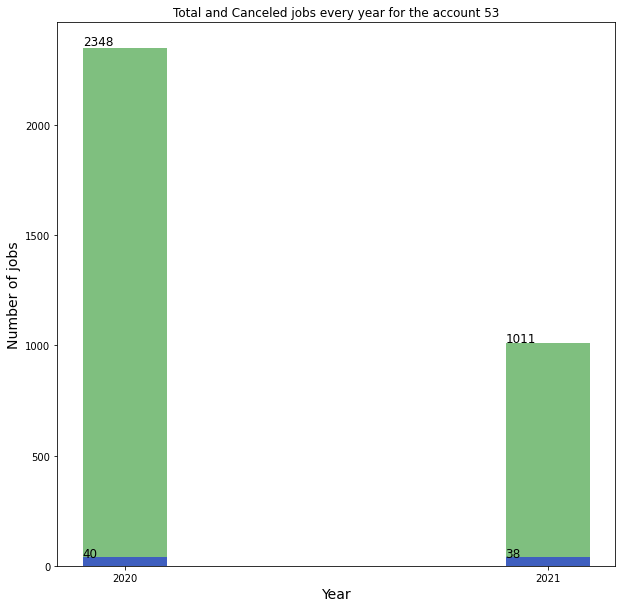

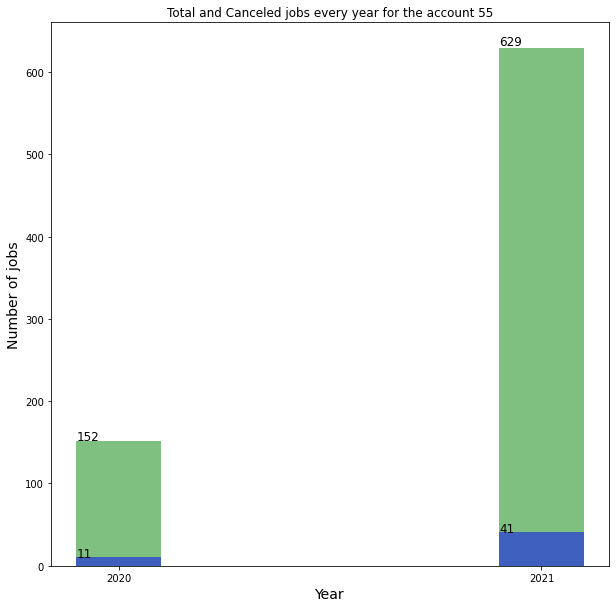

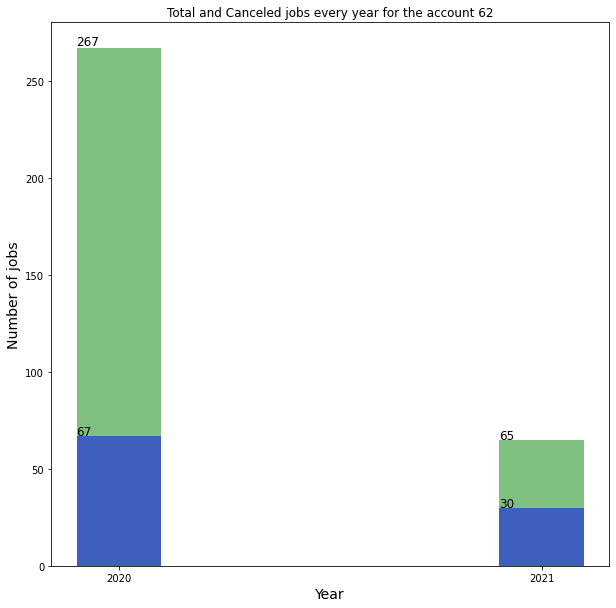

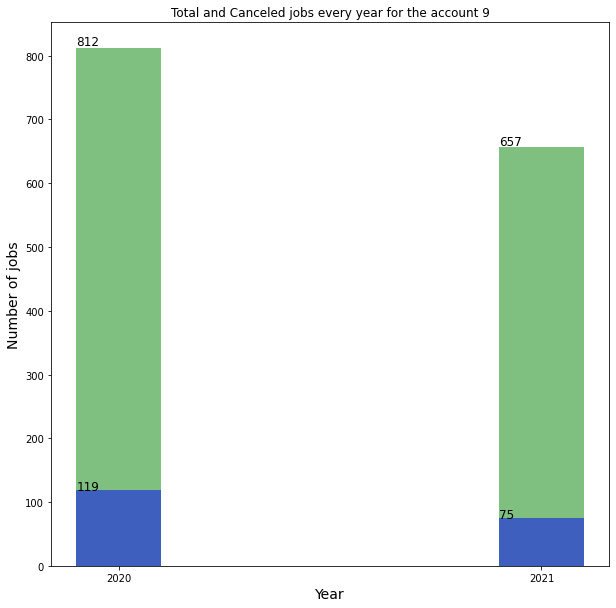

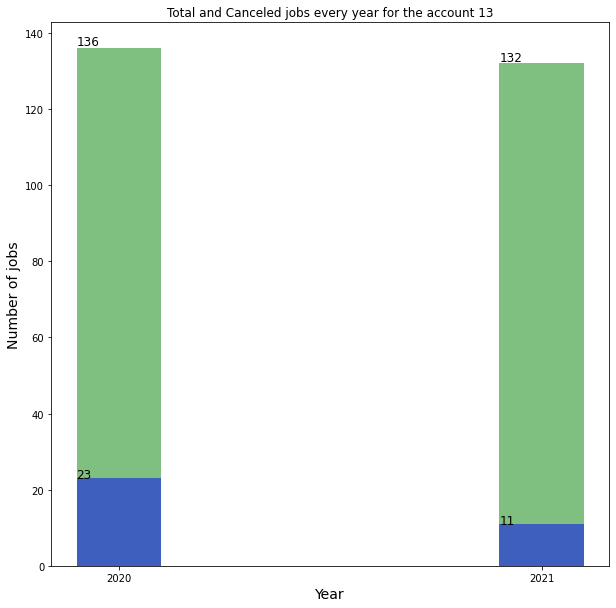

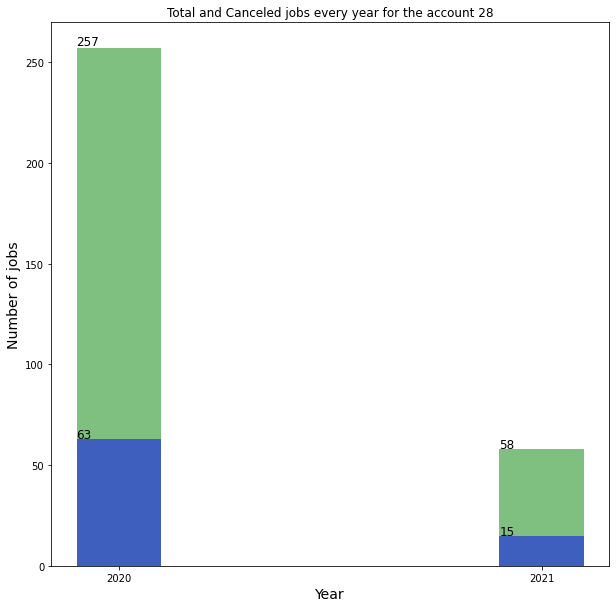

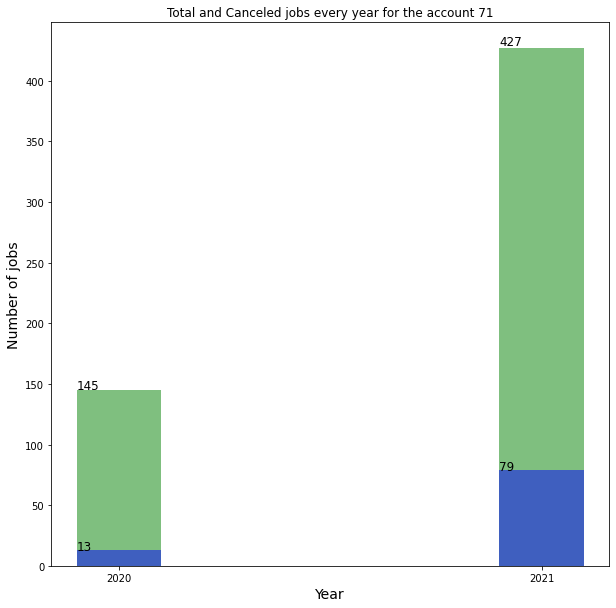

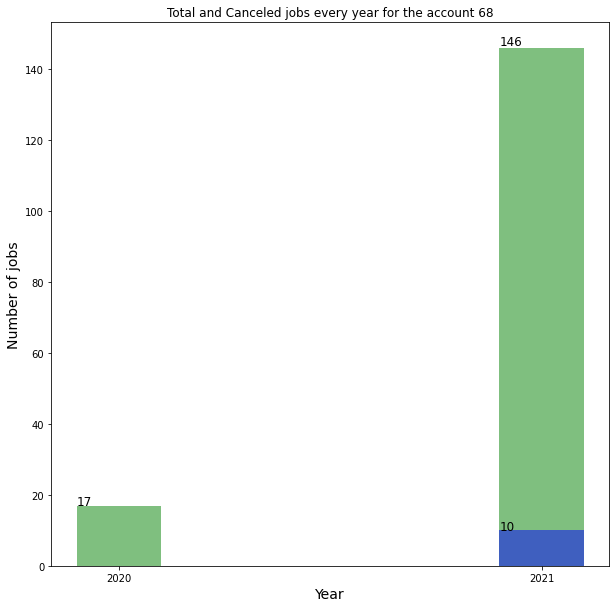

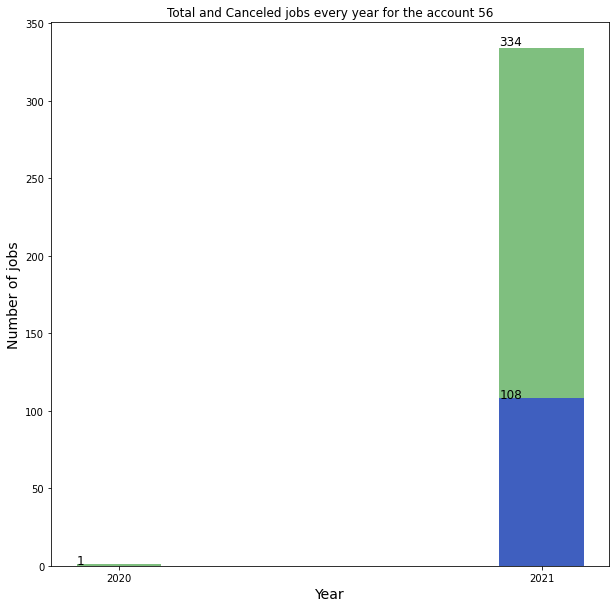

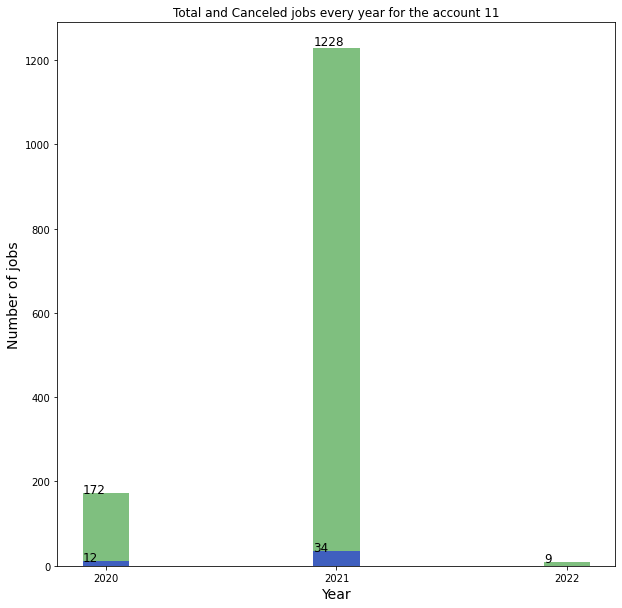

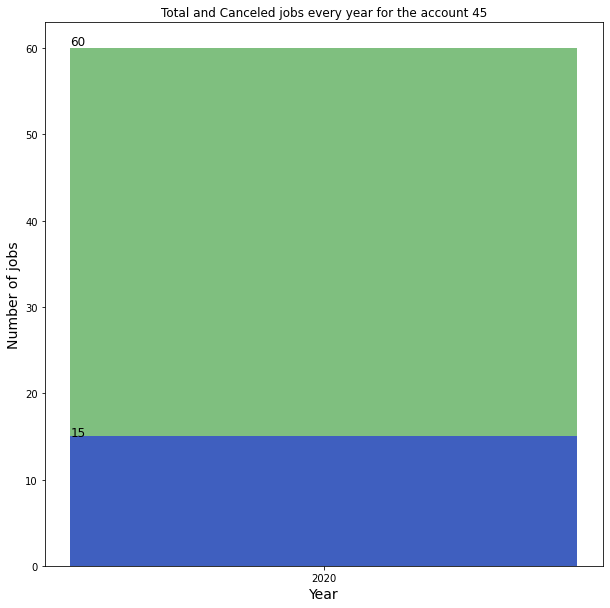

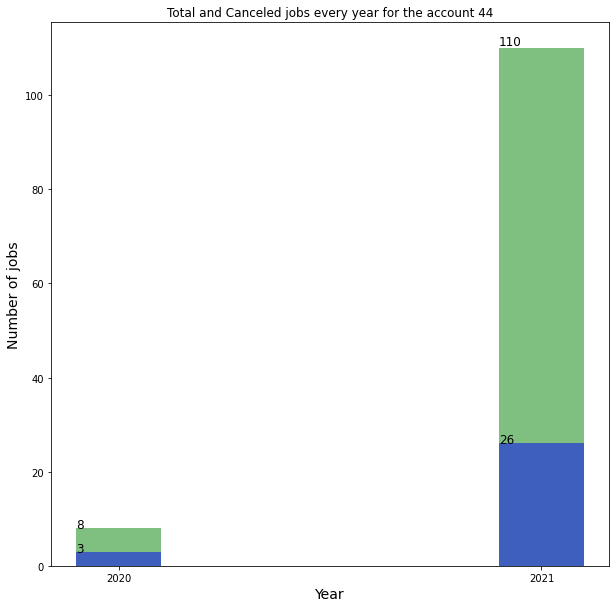

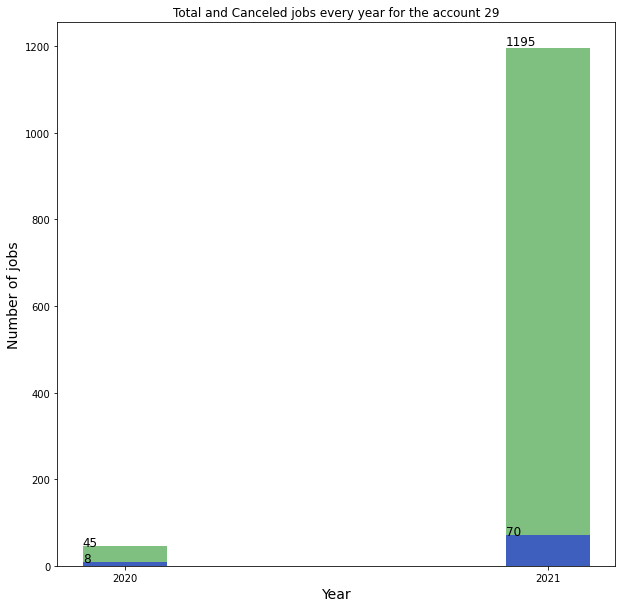

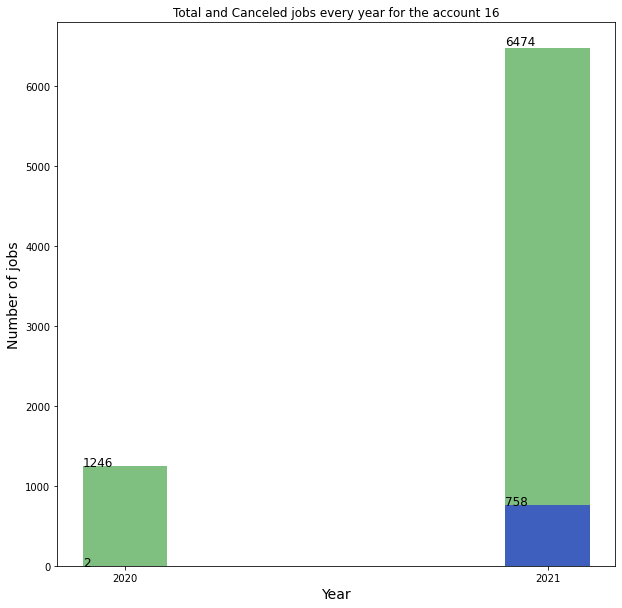

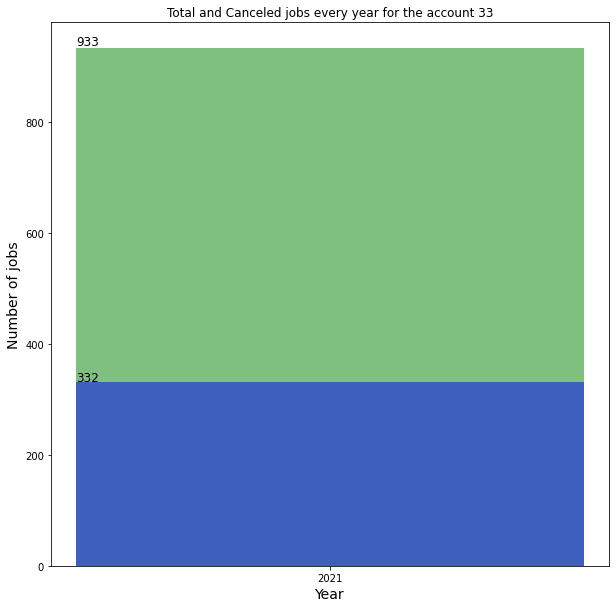

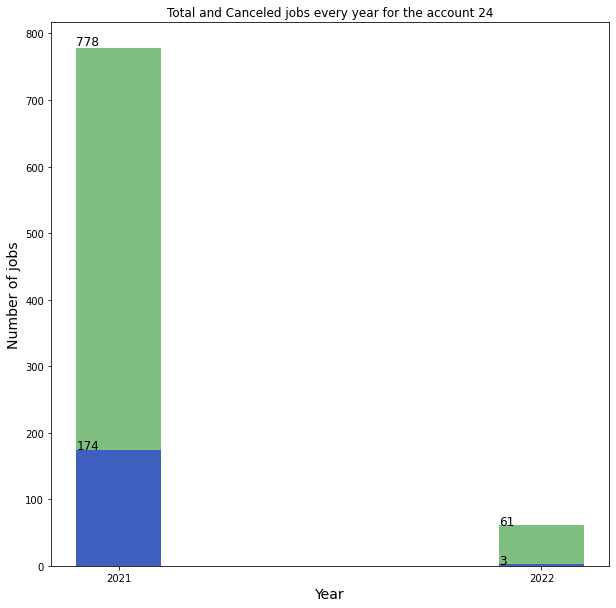

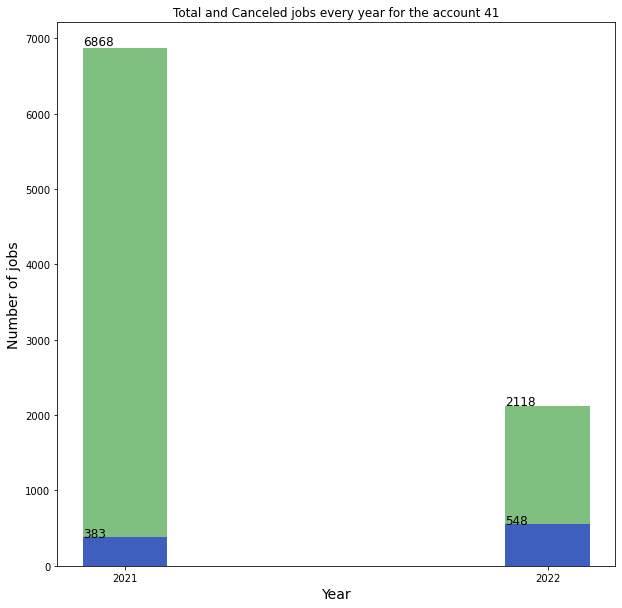

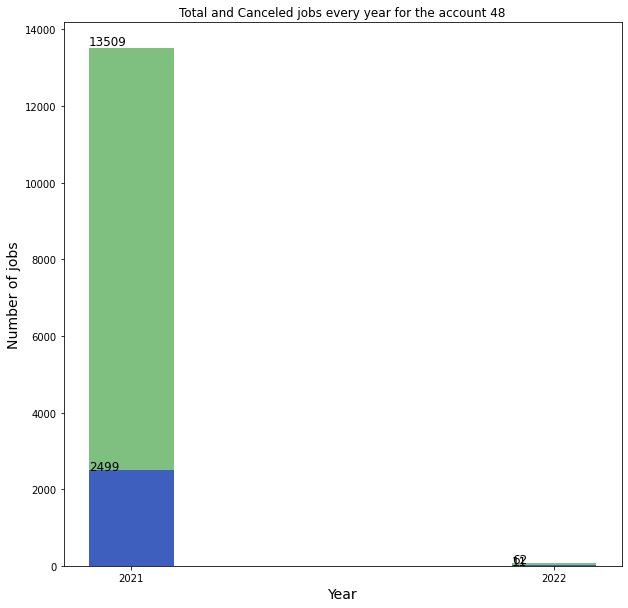

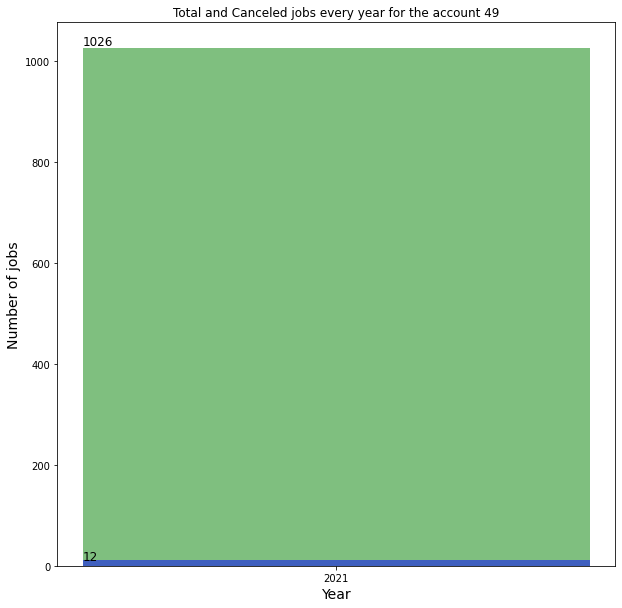

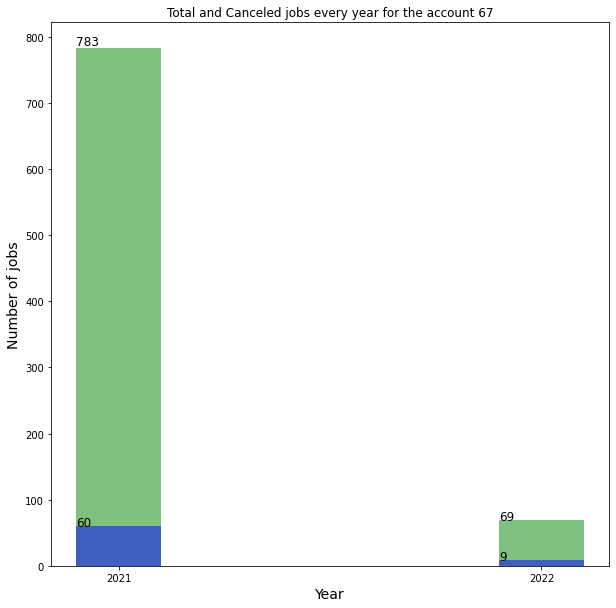

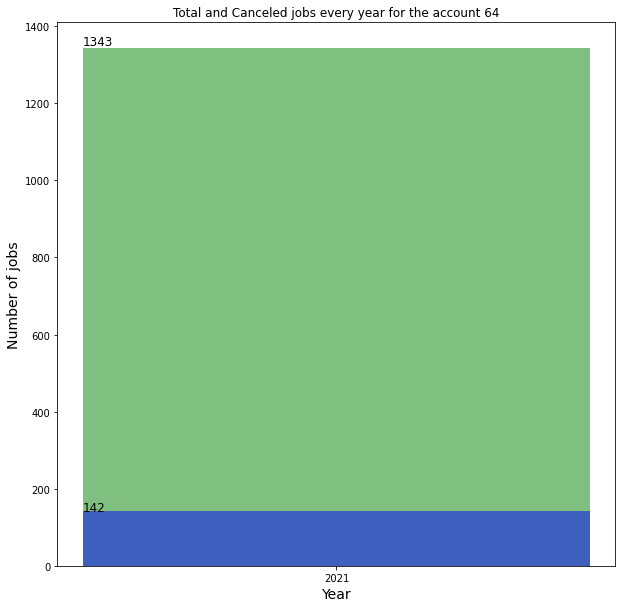

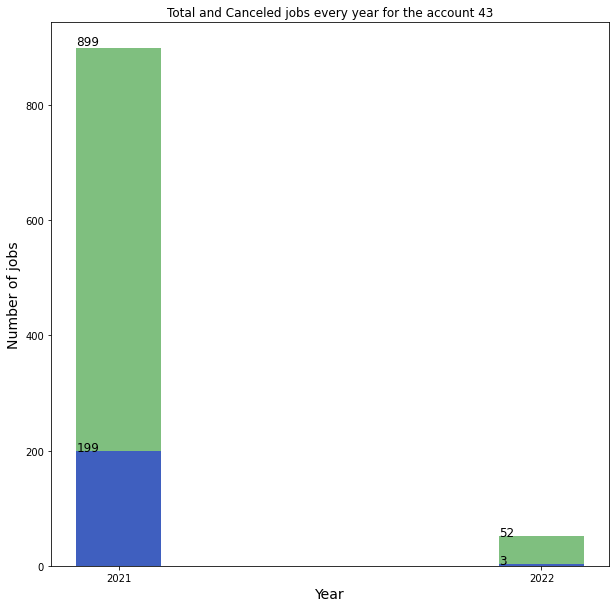

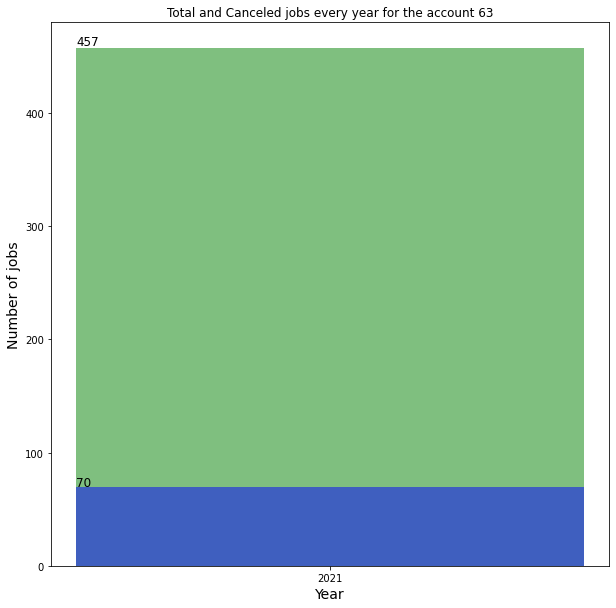

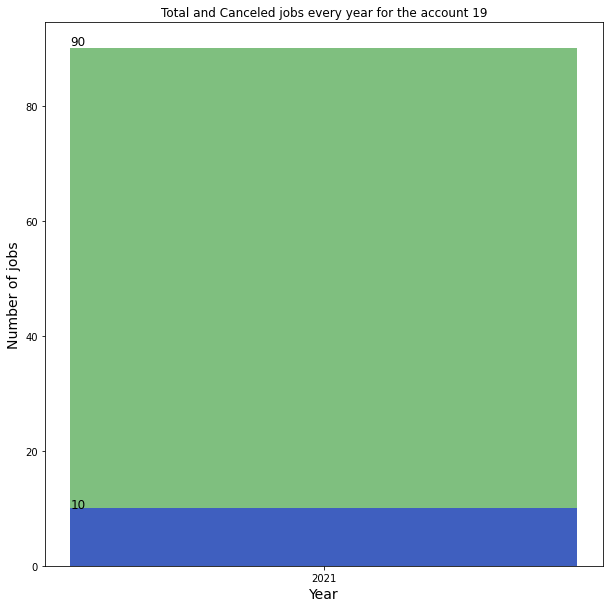

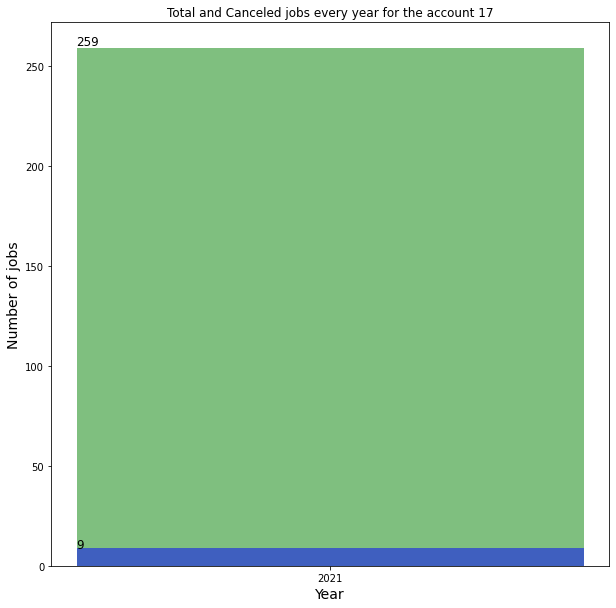

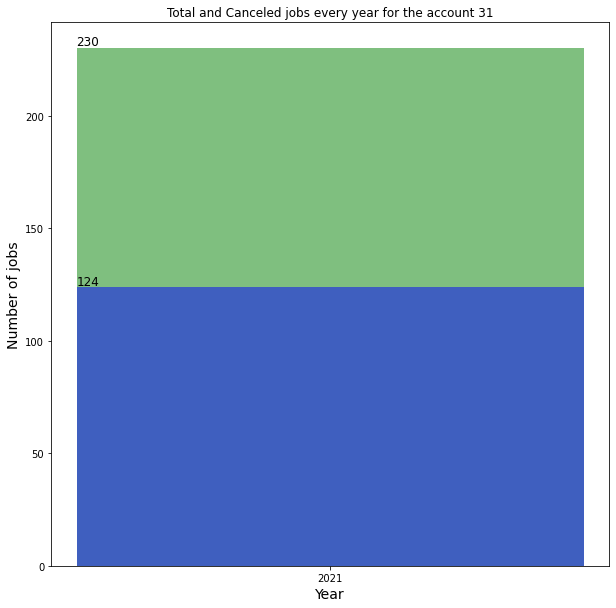

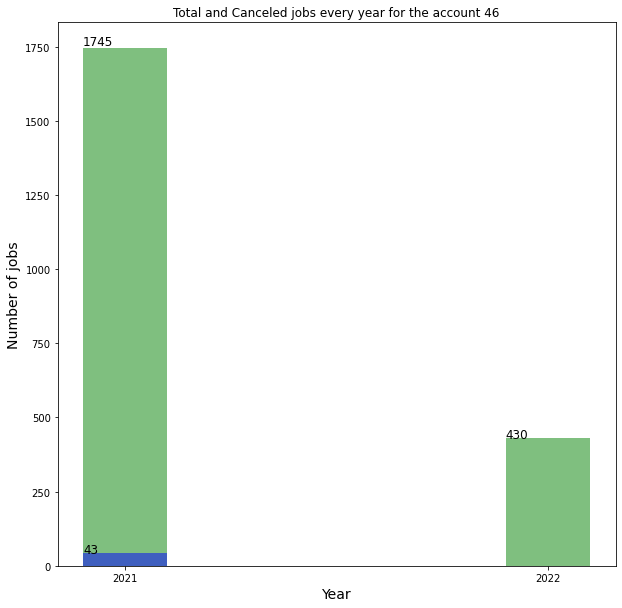

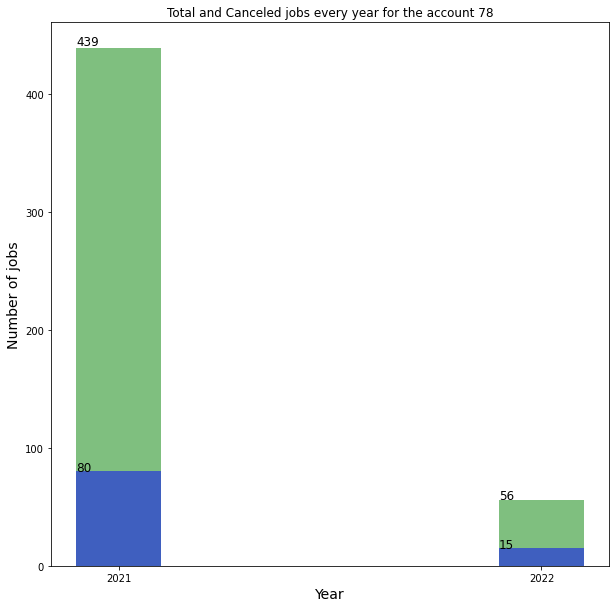

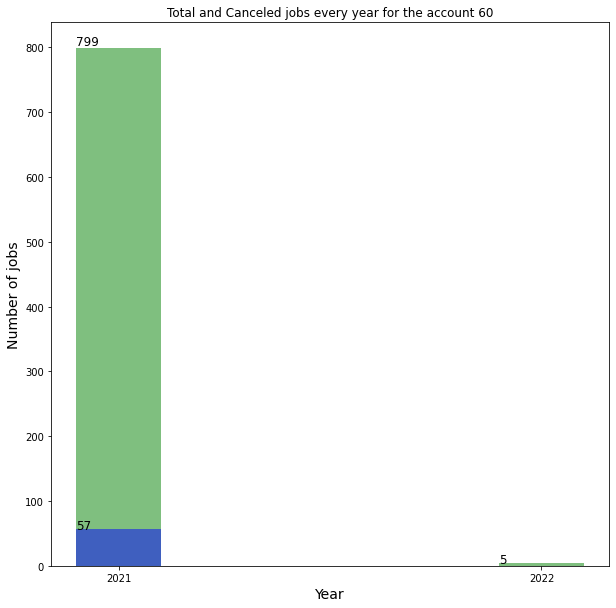

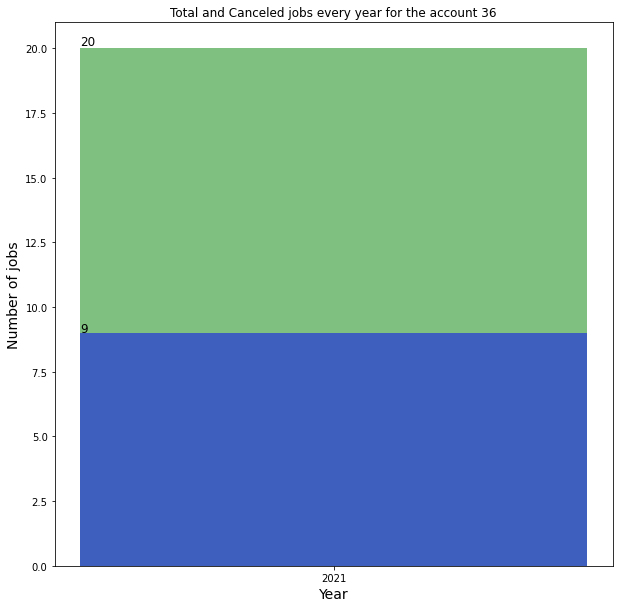

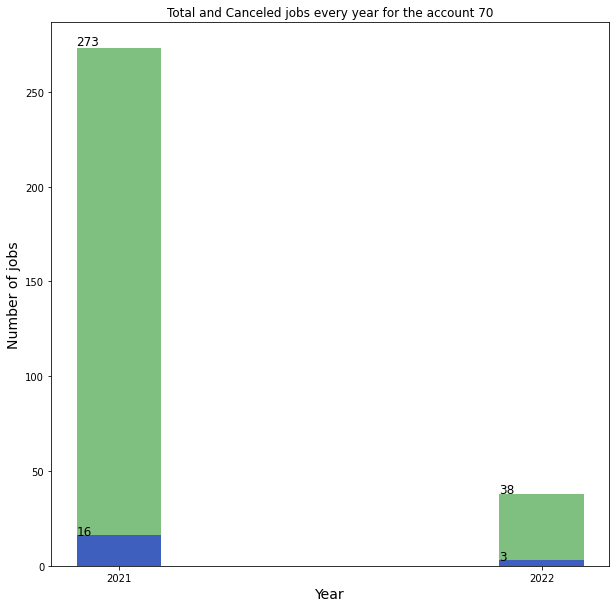

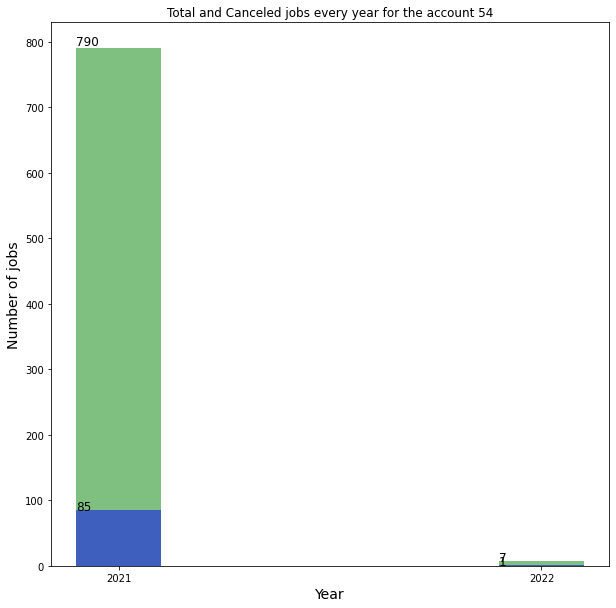

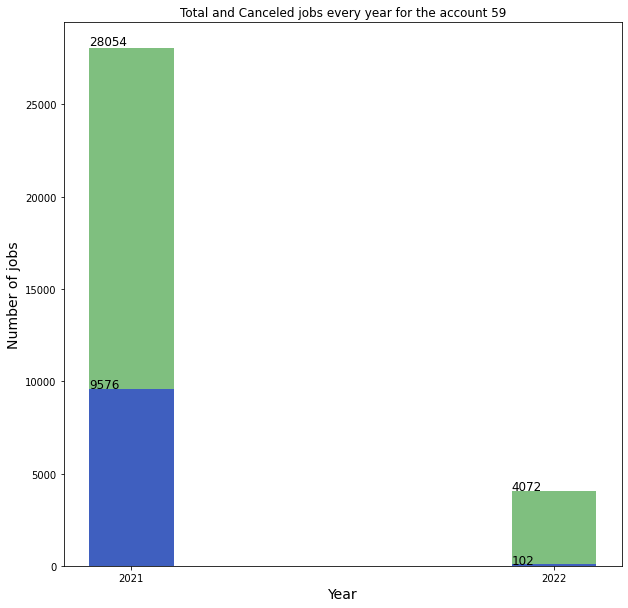

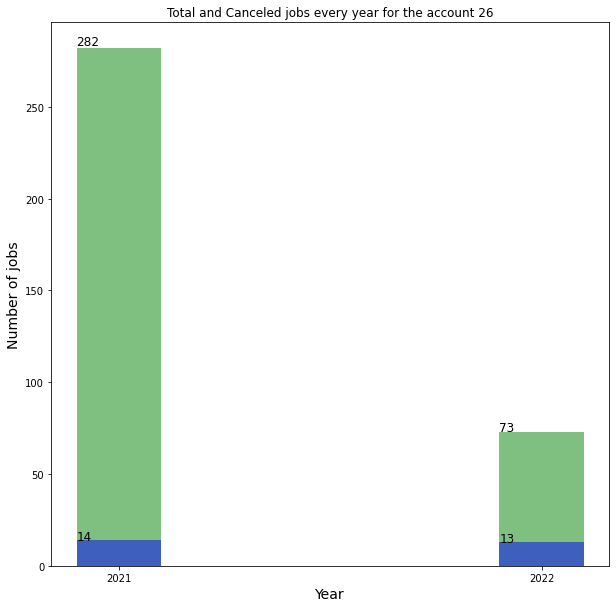

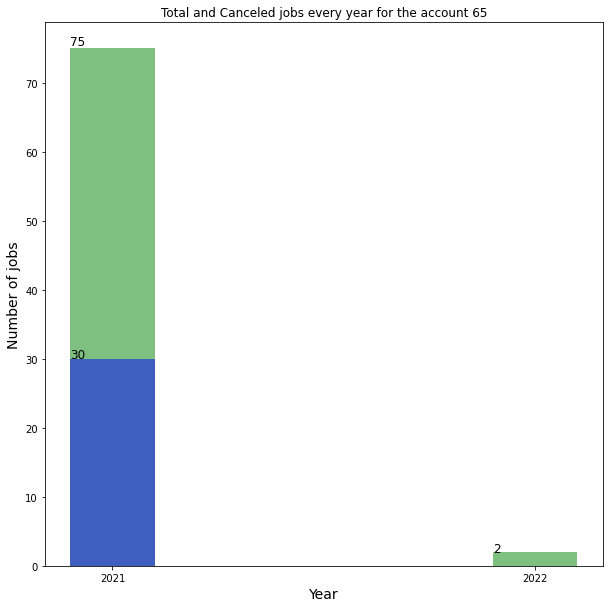

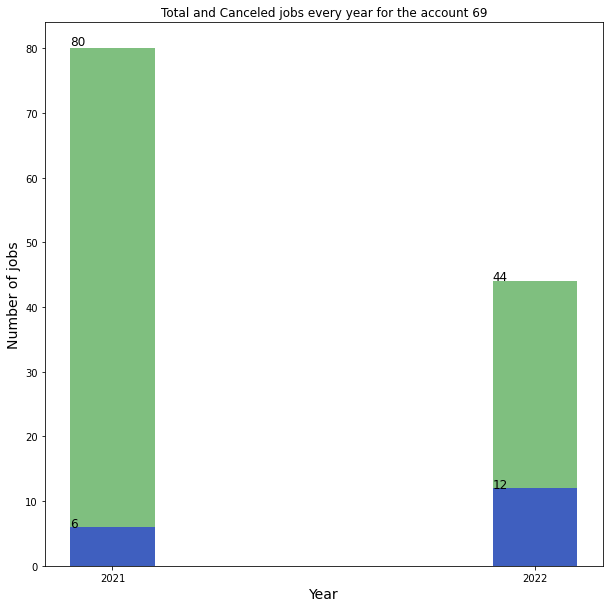

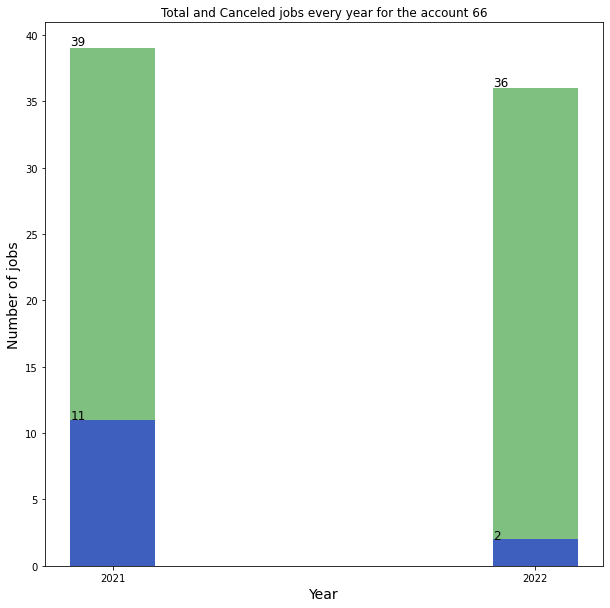

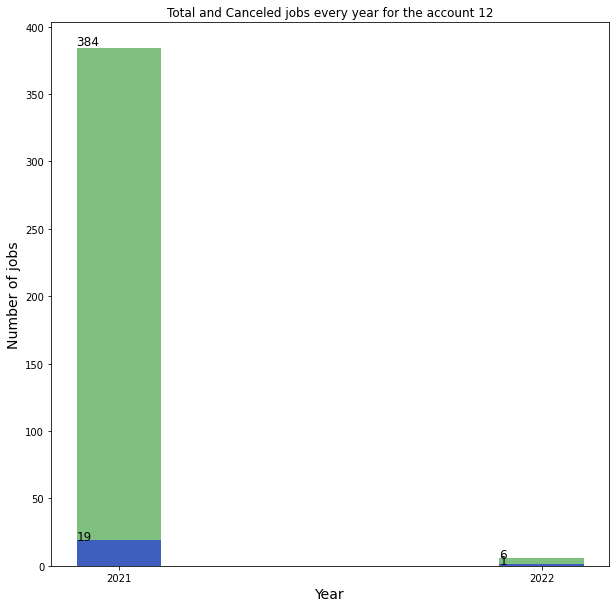

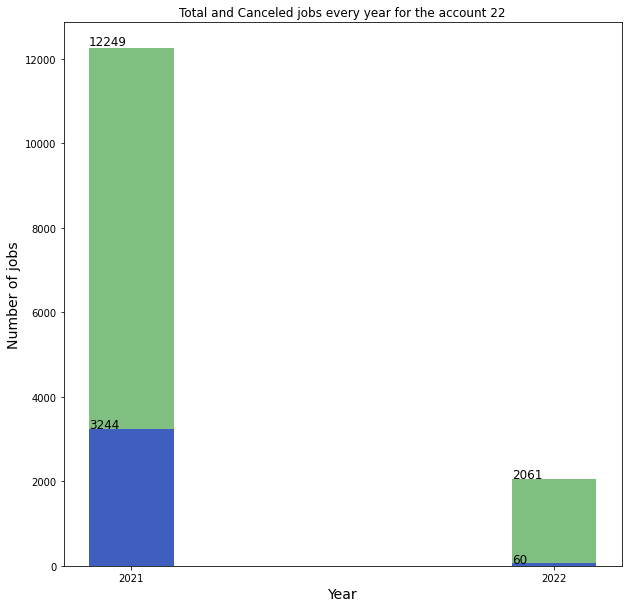

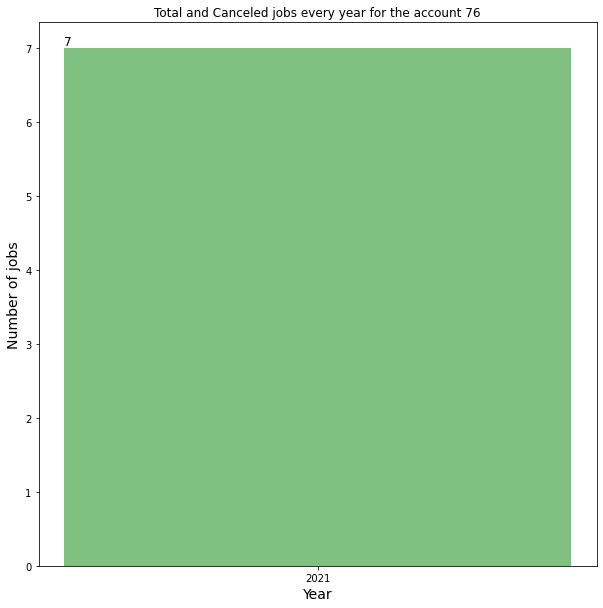

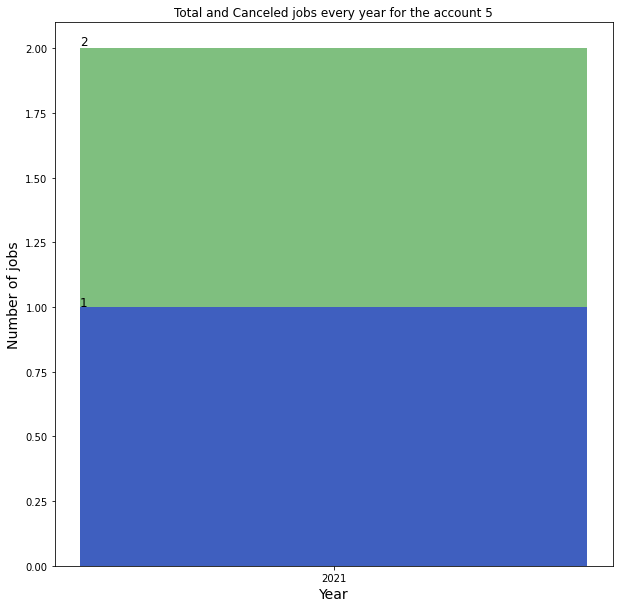

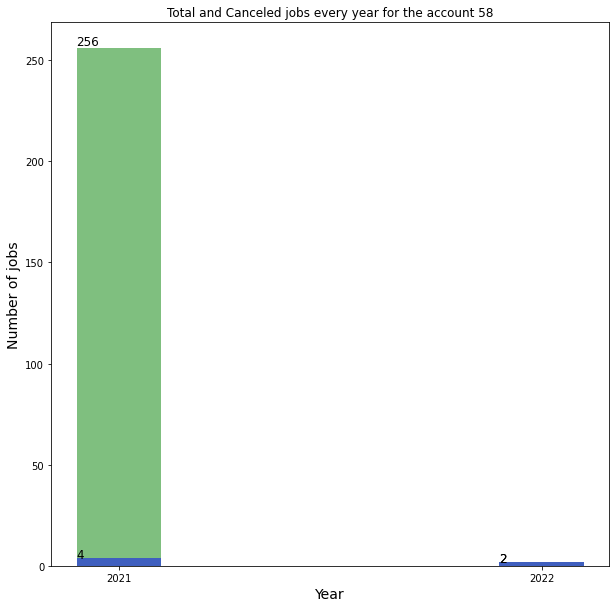

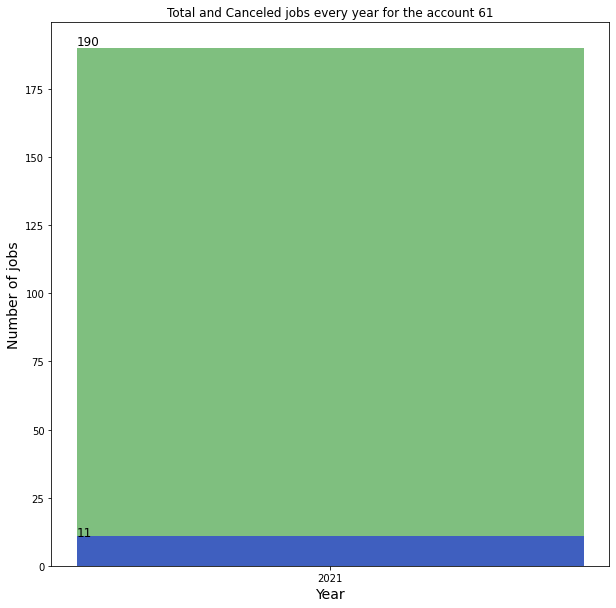

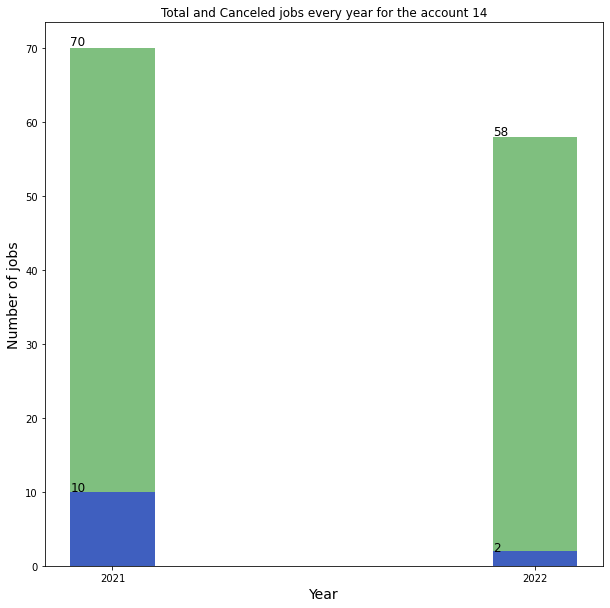

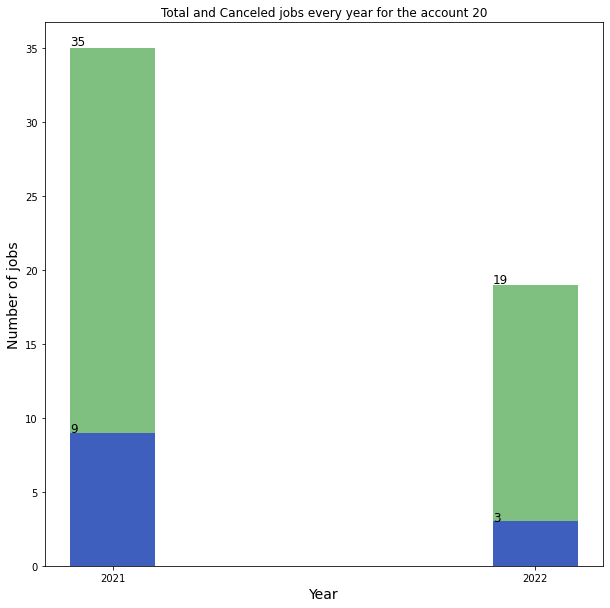

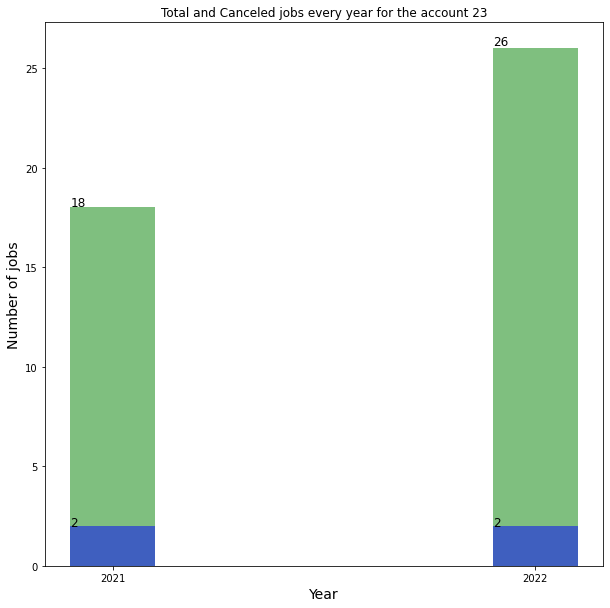

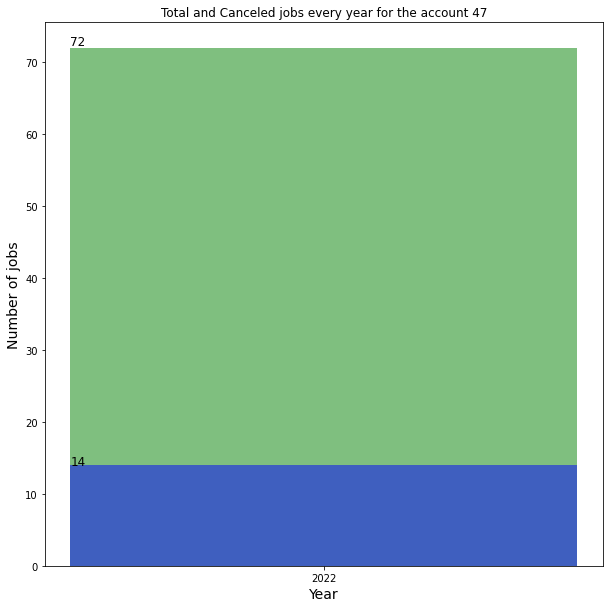

In [95]:
account = waittime['Account'].unique()
account = account.tolist()
functionc(account)

In [96]:
slurm2 = slurm1.copy()

In [97]:
slurm2['JobID'] = slurm2['JobID'].apply(str)
def case1(value):
    if '.' in value:
        return value.split('.')[0]
    else:
        return value
slurm2['JobID'] = slurm2['JobID'].map(lambda x: case1(x))

In [98]:
slurm2['JobID'] = slurm2['JobID'].infer_objects()

In [99]:
slurm3 = slurm2.groupby('JobID', as_index=False).agg({'MaxRSS':'max'})

In [100]:
slurm3.head(5)

,JobID,MaxRSS
0,1000000,1.2960
1,1000001,1.2960
2,1000002,1.2960
3,1000003,1.2960
4,1000004,1.2960


In [101]:
waittimee = pd.merge(waittime, slurm3, on=['JobID'])

In [102]:
waittimee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886360 entries, 0 to 886359
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   UID                886360 non-null  float64
 1   JobID              886360 non-null  object 
 2   Account            886360 non-null  int64  
 3   Submittimestamp    886360 non-null  float64
 4   Start              886360 non-null  object 
 5   End                886360 non-null  object 
 6   Eligibletimestamp  886360 non-null  float64
 7   Starttimestamp     886360 non-null  object 
 8   Endtimestamp       886360 non-null  object 
 9   AllocNodes         886360 non-null  int64  
 10  AllocCPUS          886360 non-null  int64  
 11  TimelimitRaw       886360 non-null  float64
 12  NNodes             886360 non-null  int64  
 13  Submit             886360 non-null  object 
 14  State              886360 non-null  object 
 15  ExitCode           886360 non-null  object 
 16  QO

In [103]:

waittimee = waittimee.dropna(subset=['MaxRSS'])

In [104]:

waittimee.loc[waittimee['State'].str.contains('by'), 'State'] = 'CANCELLED'

In [105]:
canceled.head()

,UID,JobID,Account,Submittimestamp,Start,End,Eligibletimestamp,Starttimestamp,Endtimestamp,AllocNodes,AllocCPUS,TimelimitRaw,NNodes,Submit,State,ExitCode,QOS,QOSRAW,Partition,TRESAllocMem,TRESINMaxUsagemem,TotalCPUtime,JobLen,Totalres,Jcount,Waittime,year,month,yearmonth
0,123.0000,168224,72,1553509637.0000,2019-04-02 17:10:12,2019-04-02 17:10:12,1553509637.0000,1554217812.0000,1554217812.0000,0,720,10920.0000,18,2019-03-25 11:27:17,CANCELLED,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,708175.0000,2019,3,2019-3
1,123.0000,168225,72,1553509762.0000,2019-04-02 17:10:12,2019-04-02 17:10:12,1553509762.0000,1554217812.0000,1554217812.0000,0,960,7260.0000,24,2019-03-25 11:29:22,CANCELLED,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,708050.0000,2019,3,2019-3
2,72.0000,168230,72,1553510698.0000,2019-04-02 17:10:04,2019-04-02 17:10:04,1553510698.0000,1554217804.0000,1554217804.0000,0,40,7200.0000,1,2019-03-25 11:44:58,CANCELLED,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,707106.0000,2019,3,2019-3
3,72.0000,168231,72,1553510741.0000,2019-04-02 17:10:04,2019-04-02 17:10:04,1553510741.0000,1554217804.0000,1554217804.0000,0,40,7200.0000,1,2019-03-25 11:45:41,CANCELLED,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,707063.0000,2019,3,2019-3
4,72.0000,168232,72,1553510783.0000,2019-04-02 17:10:04,2019-04-02 17:10:04,1553510783.0000,1554217804.0000,1554217804.0000,0,40,7200.0000,1,2019-03-25 11:46:23,CANCELLED,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,707021.0000,2019,3,2019-3


# Failed, canceled, node fail jobs according to job size

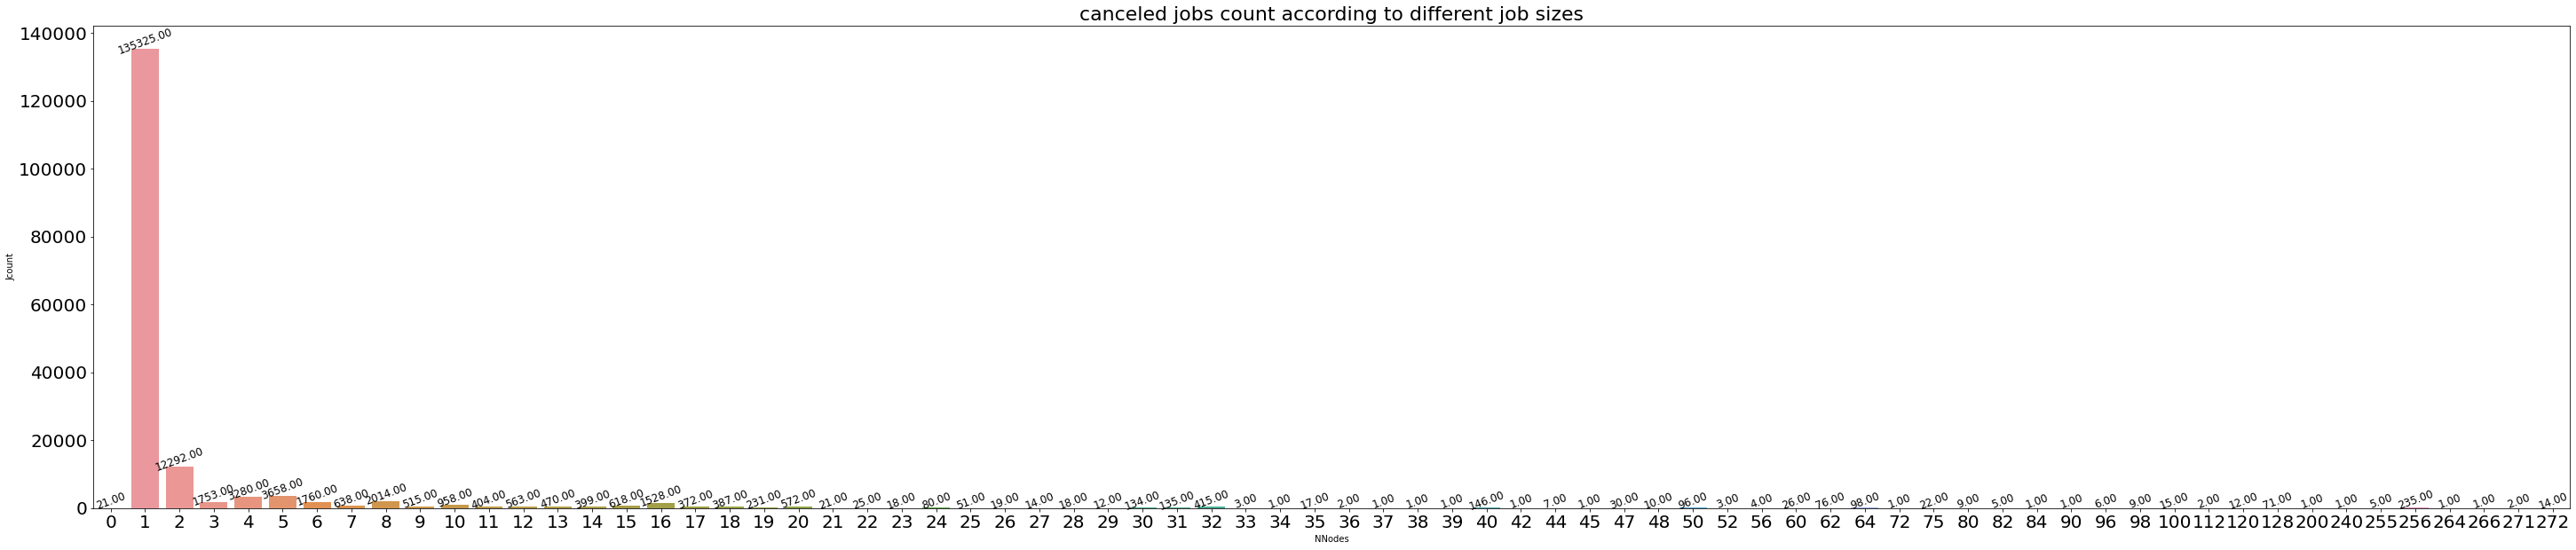

In [106]:
from pylab import rcParams
rcParams['figure.figsize'] = 50, 10
canceled['NNodes'] = canceled['NNodes'].apply(str)
temp1 = canceled.groupby(['NNodes'], as_index=False).agg({'Jcount':'sum'})
temp1['NNodes'] = temp1['NNodes'].apply(int)
plots = sns.barplot(x ='NNodes',y = 'Jcount',data =  temp1)
plots.set_title('canceled jobs count according to different job sizes',size = 22)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points',rotation = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
if not os.path.exists('failed_canceled_jobs'):
    os.makedirs('failed_canceled_jobs')
plt.savefig('failed_canceled_jobs/canceled_jobs.png')

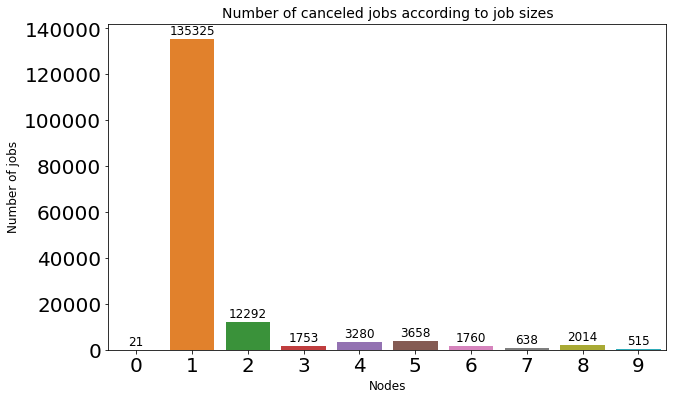

In [112]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
canceled['NNodes'] = canceled['NNodes'].apply(str)
temp1 = canceled.groupby(['NNodes'], as_index=False).agg({'Jcount':'sum'})
temp1['NNodes'] = temp1['NNodes'].apply(int)
temp1 = temp1.loc[temp1['NNodes'] < 10]
plots = sns.barplot(x ='NNodes',y = 'Jcount',data =  temp1 )
plots.set_title('Number of canceled jobs according to job sizes',size = 14)
plots.set_xlabel("Nodes", size = 12)
plots.set_ylabel("Number of jobs", size = 12)
for bar in plots.patches:
    plots.annotate(int(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points',rotation = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
if not os.path.exists('failed_canceled_jobs'):
    os.makedirs('failed_canceled_jobs')
plt.savefig('failed_canceled_jobs/canceled_jobs1.png')

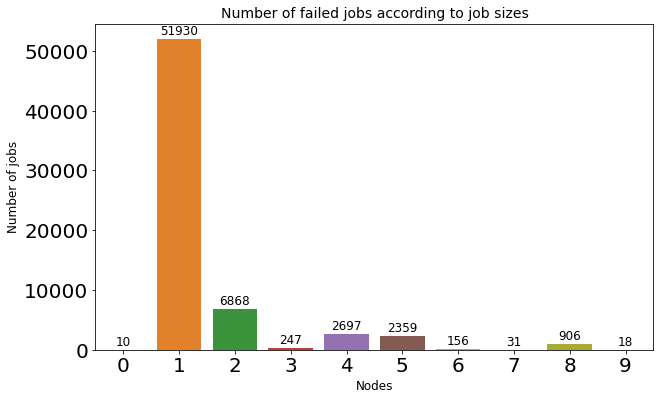

In [114]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
failed['NNodes'] = failed['NNodes'].apply(str)
temp1 = failed.groupby(['NNodes'], as_index=False).agg({'Jcount':'sum'})
temp1['NNodes'] = temp1['NNodes'].apply(int)
temp1 = temp1.loc[temp1['NNodes'] < 10]
plots = sns.barplot(x ='NNodes',y = 'Jcount',data =  temp1)
plots.set_xlabel("Nodes", size = 12)
plots.set_ylabel("Number of jobs", size = 12)
plots.set_title('Number of failed jobs according to job sizes',size = 14)
for bar in plots.patches:
    plots.annotate(int(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points',rotation = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
if not os.path.exists('failed_canceled_jobs'):
    os.makedirs('failed_canceled_jobs')
plt.savefig('failed_canceled_jobs/failed_jobs1.png')

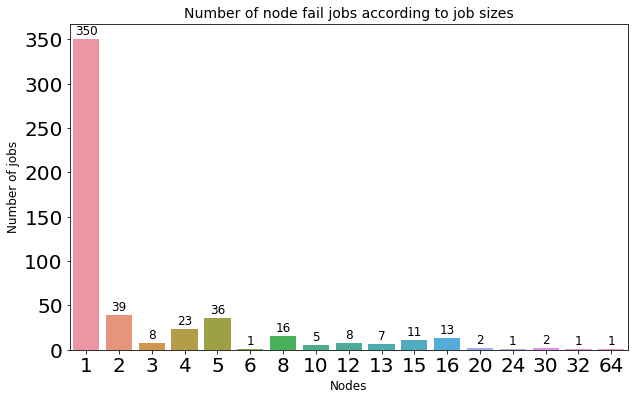

In [117]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
nodefail['NNodes'] = nodefail['NNodes'].apply(str)
temp1 = nodefail.groupby(['NNodes'], as_index=False).agg({'Jcount':'sum'})
temp1['NNodes'] = temp1['NNodes'].apply(int)
plots = sns.barplot(x ='NNodes',y = 'Jcount',data =  temp1)
plots.set_title('node fail jobs count according to different job sizes',size = 16)
plots.set_xlabel("Nodes", size = 12)
plots.set_ylabel("Number of jobs", size = 12)
plots.set_title('Number of node fail jobs according to job sizes',size = 14)
for bar in plots.patches:
    plots.annotate(int(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points',rotation = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
if not os.path.exists('failed_canceled_jobs'):
    os.makedirs('failed_canceled_jobs')
plt.savefig('failed_canceled_jobs/nodefail_jobs1.png')

## Job states according time limit and run time

In [120]:
def functionstate(states):
    coun = 0
    for i in states:
        print(i)
        temp = waittimee.loc[waittimee.State == i] 
        jobs = temp.shape[0]
        rcParams['figure.figsize'] = 10, 8
        import matplotlib.pyplot as plt
        mm=21*24*3600
        fig = plt.figure()
        ax = fig.add_subplot(111)
        heatmap, xedges, yedges = np.histogram2d(x=temp['JobLen'],y=temp['TimelimitRaw'] * 60,weights=temp['Totalres'] ,bins=200,range=[[0,mm],[0,mm]])
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        print(heatmap.min(),heatmap.max())
        cutoff=10
        pcm=plt.pcolormesh(xedges, yedges, heatmap, cmap='inferno',norm=colors.LogNorm(vmin=heatmap.min()+cutoff, vmax=heatmap.max()+cutoff))
        plt.xlabel('Timelimit in seconds')
        plt.ylabel('Runtime in seconds')
        plt.xlim(0,mm)
        plt.ylim(0,mm)
        plt.axis('square')

        plt.title('The 2-D histogram for the {} jobs'.format(i))
        fig.colorbar(pcm, ax=ax, extend='max')
        if not os.path.exists('failed_canceled_jobs'):
            os.makedirs('failed_canceled_jobs')
        plt.savefig('failed_canceled_jobs/{}_states_jobs.png' .format(i),bbox_inches='tight', dpi=100)
        plt.show()

TIMEOUT
0.0 1209976551.0


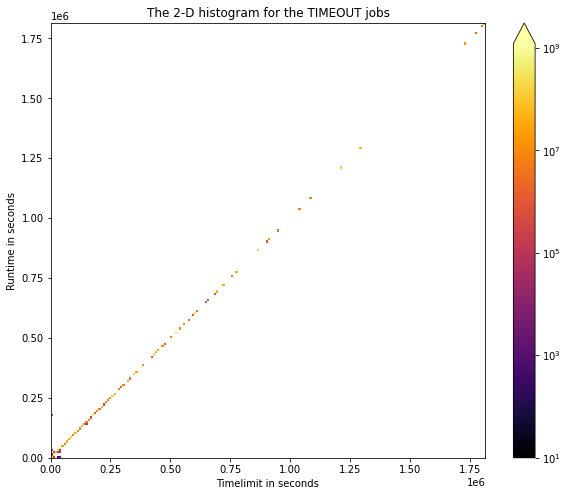

FAILED
0.0 39360652.0


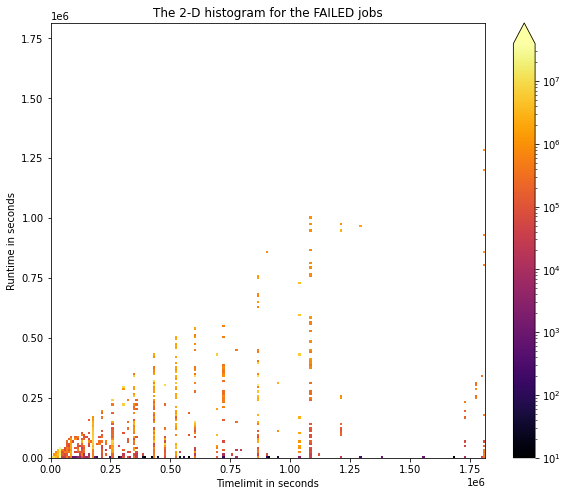

CANCELLED
0.0 63296183.0


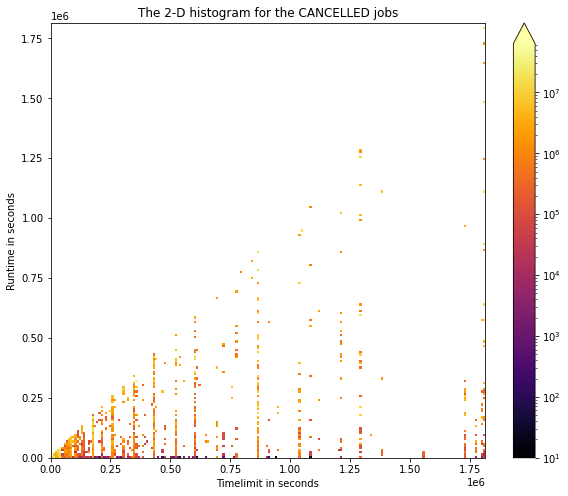

COMPLETED
0.0 626864096.0


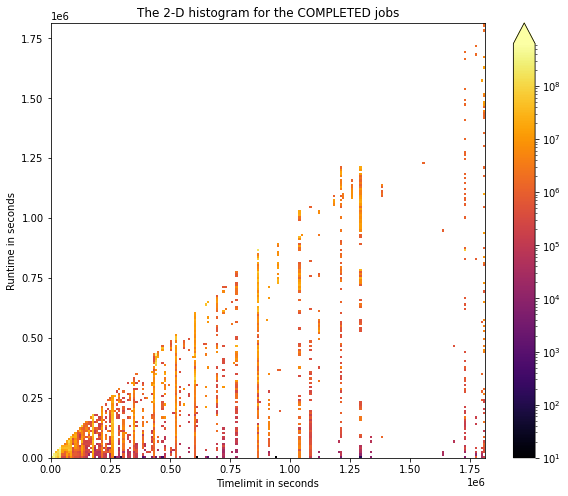

OUT_OF_MEMORY
0.0 1267229.0


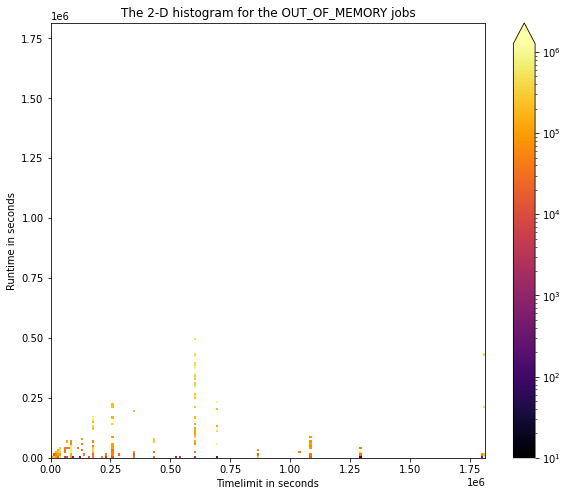

NODE_FAIL
0.0 7931495.0


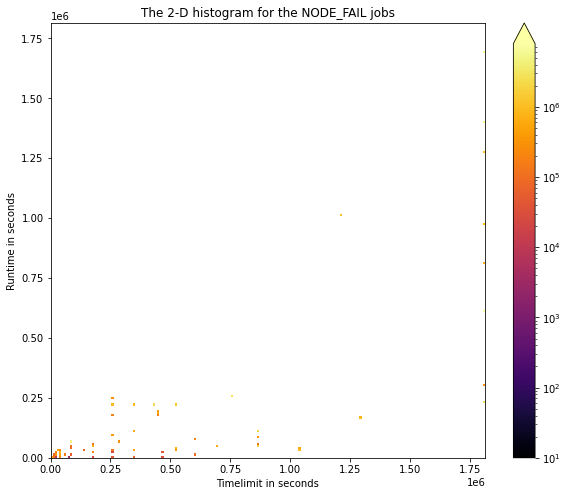

RUNNING
0.0 0.0


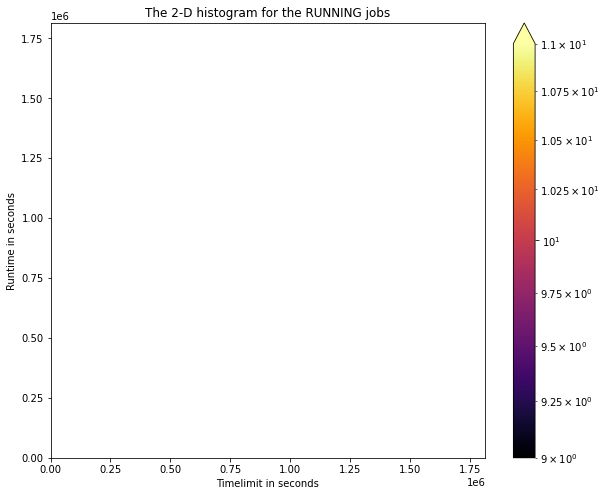

In [121]:
states = waittimee['State'].unique()
states = states.tolist()
functionstate(states)

In [36]:
def functionstateres(states):
    coun = 0
    for i in states:
        print(i)
        temp = waittimee.loc[waittimee.State == i] 
        jobs = temp.shape[0]
        rcParams['figure.figsize'] = 15, 15
        import matplotlib.pyplot as plt
        mm=21*24*3600
        fig = plt.figure()
        ax = fig.add_subplot(111)
        heatmap, xedges, yedges = np.histogram2d(x=temp['JobLen'],y=temp['TimelimitRaw'] * 60,weights=temp['Totalres'] ,bins=200,range=[[0,mm],[0,mm]])
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        print(heatmap.min(),heatmap.max())
        cutoff=10
        pcm=plt.pcolormesh(xedges, yedges, heatmap, cmap='inferno',norm=colors.LogNorm(vmin=heatmap.min()+cutoff, vmax=heatmap.max()+cutoff))
        plt.xlabel('timelimit')
        plt.ylabel('runtime')
        plt.xlim(0,mm)
        plt.ylim(0,mm)
        plt.axis('square')

        plt.title('k')
        fig.colorbar(pcm, ax=ax, extend='max')
        if not os.path.exists('failed_canceled_jobs'):
            os.makedirs('failed_canceled_jobs')
        plt.savefig('failed_canceled_jobs/{}_resources_states_jobs.png' .format(i),bbox_inches='tight', dpi=100)
        plt.show()

TIMEOUT
0.0 1209976551.0


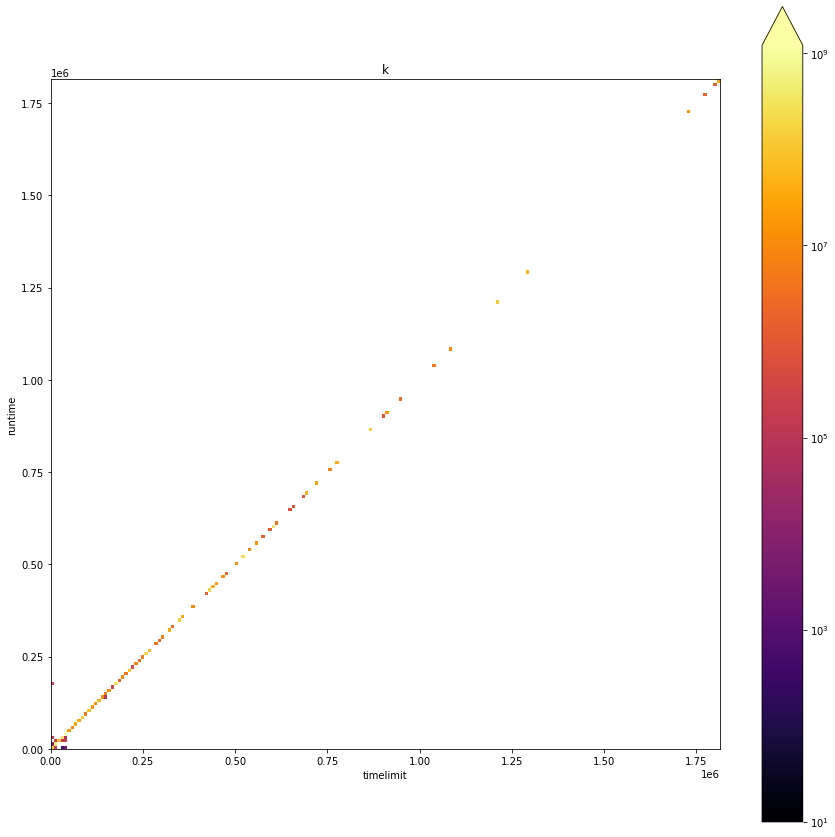

FAILED
0.0 39360652.0


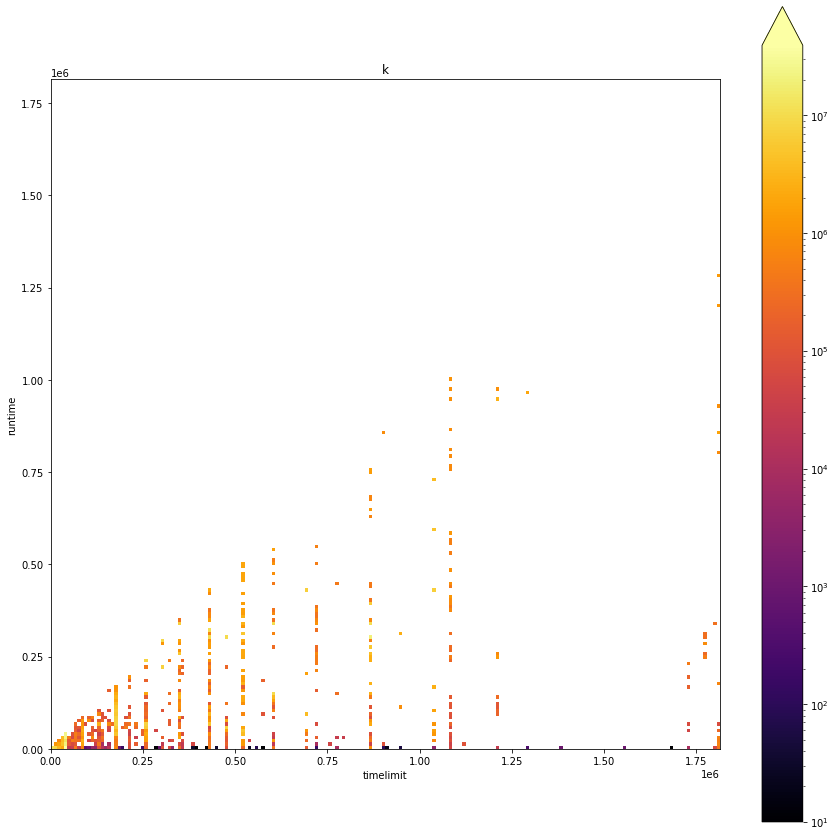

CANCELLED
0.0 63296183.0


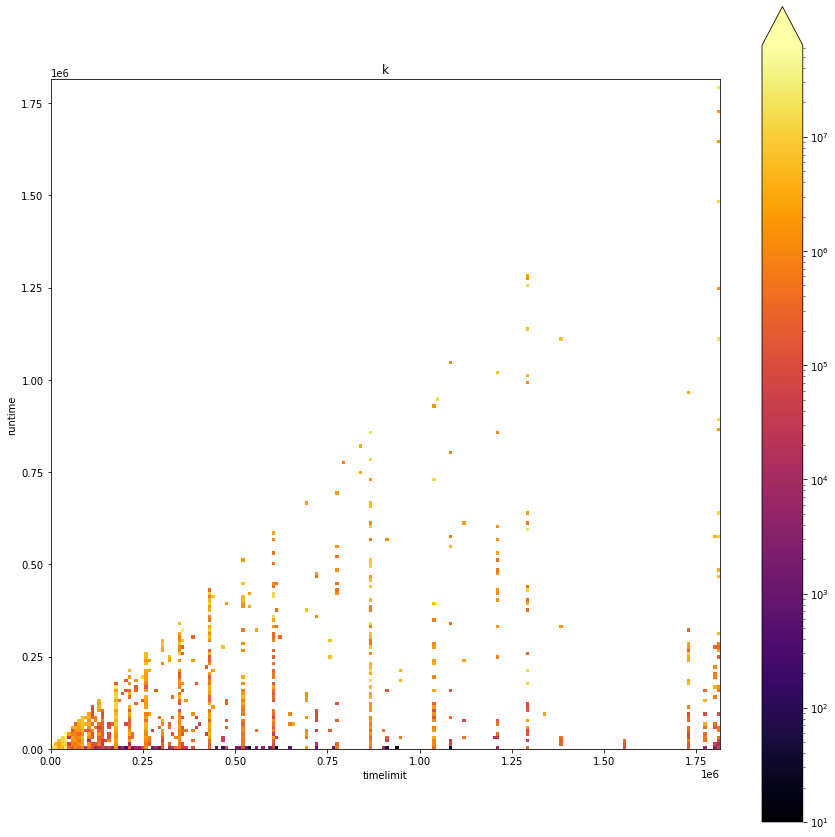

COMPLETED
0.0 626864096.0


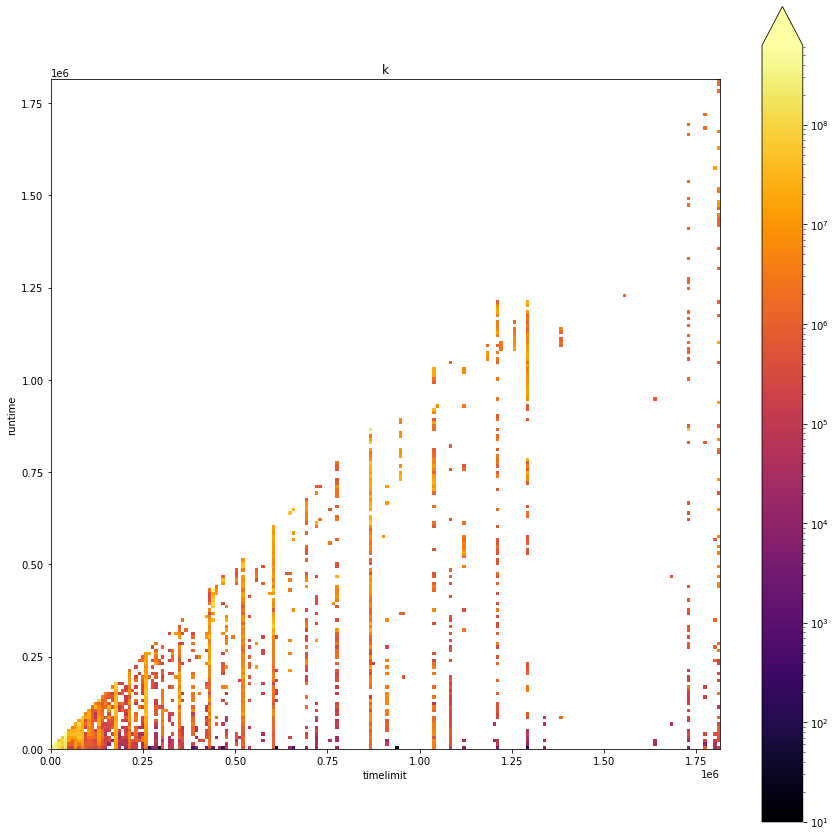

OUT_OF_MEMORY
0.0 1267229.0


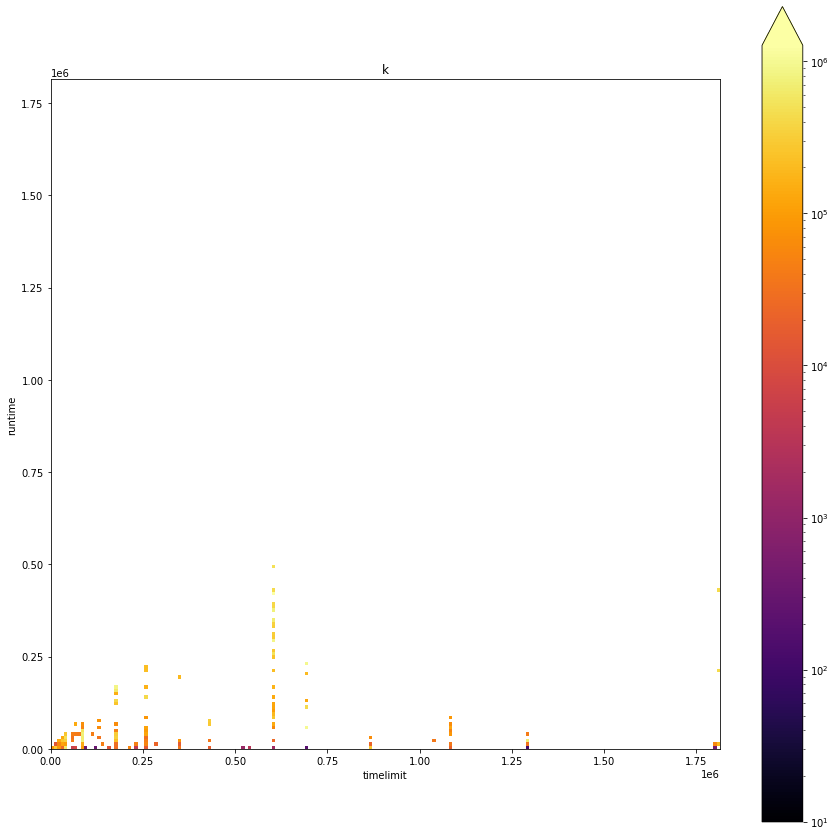

NODE_FAIL
0.0 7931495.0


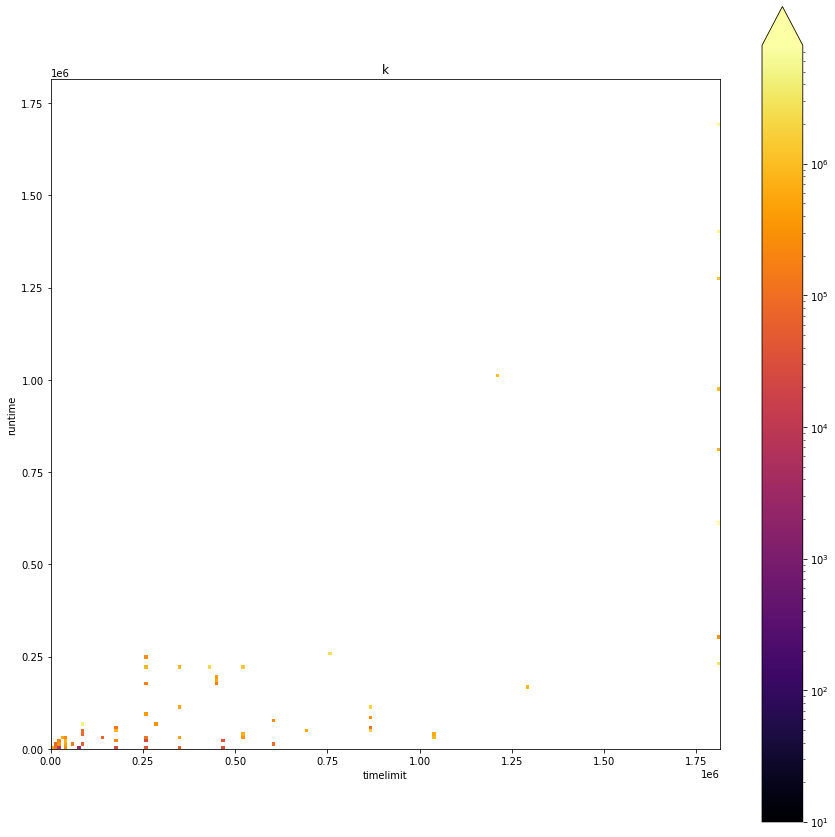

RUNNING
0.0 0.0


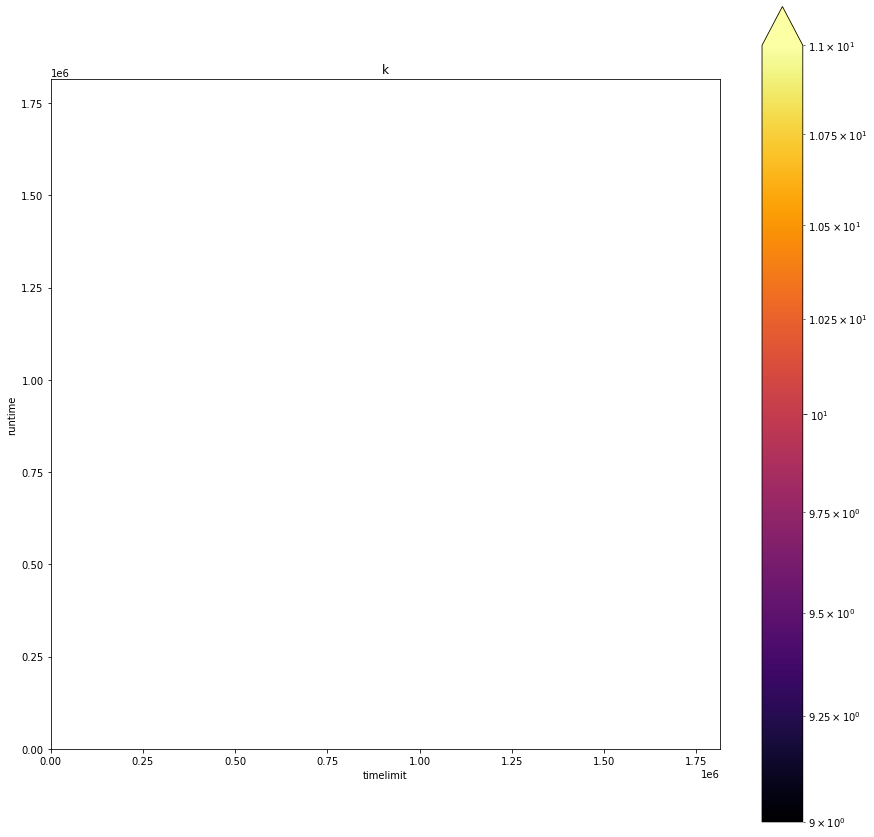

In [37]:
states = waittimee['State'].unique()
states = states.tolist()
functionstateres(states)